In [2]:
# Import (3) dependencies
import json          # to extract the Wikipedia data
import pandas as pd  # to create DataFrames
import numpy as np   # for converting data types

import re            # for regex (see Module 8.3.8)

Note: Throughout this notebook, unless otherwise notated, comments are
directly quoted or paraphrased from Module 8 (ETL - Extract, Transform,
Load) material.

In [3]:
# Note: Throughout this notebook, unless otherwise notated, comments are
# directly quoted or paraphrased from Module 8 (ETL - Extract, Transform,
# Load) material.

# 8.2.1 Extract the Wikipedia Movies JSON
# ...here (in Jupyter Notebooks) we're doing "exploratory data analysis,
# as Jupyter Notebooks are great for exploring data." Eventually, "we
# can copy the code ... created to a Python script." nb this is since
# "want to create an automated pipeline, which Jupyter Notebooks aren't
# suited for."

# Pandas library has a built-in `read_json` method, but "only works well
# for data that is already clean--for example, when the JSON data has
# every field filled in every time it is returned ... (i.e.) 'flat'. ..
# if try to read raw, messy JSON data directly into a DataFrame, the
# DataFrame will be a mess too. It's very difficult to find and fix
# corrupted data in messy DataFrames, and it's also difficult to
# consolidate columns without headaches." so, we'll be reading (loading)
# "the raw JSON as a list of dictionaries before converting it to a
# DataFrame."
file_locn = "../../DataBootcamp/"
file_fldr = "Mod_8/"

file_dir = file_locn + file_fldr

# --Load the JSON into a List of Dictionaries
# "we will use the `load()` method ..Using the `with` statement, open
# the Wikipedia JSON file to be read into the variable `file`, and use
# `json.load()` to save the data to a new variable." ...
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

# "Here, `wiki_movies_raw` is now a list of dicts. ... check how many
# records were pulled in." ...
len(wiki_movies_raw)

7311

In [4]:
# do a bit of "(r)ough mental math" to see that "7,311 movies over
# about 30 years" amounts to "240 movies released"/"year, or" about
# "five movies released"/week, which seems "a little high if we're
# considering only major movies, but if for every two major motion
# pictures, there are three indie films, that doesn't seem like an
# outlandish number." .."Also, we should always take a look at a
# few individual records just to make sure that the data didn't
# come in horribly garbled. With a DataFrame, we'd do this with the
# `head()` and `tail()` methods, but with a list of dicts, we need
# to inspect the records directly." and recall that "since we're
# working with a list, we'll use index slices to select specific
# chunks of `wiki_movies_raw` to inspect directly. This is also a
# great use case for negative index slices."

# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [5]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [6]:
# ..."always a good idea to check records in the middle as well.
# Choose a number somewhere around the halfway mark and look at
# a handful of records after that index." ...

# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [7]:
# "If everything looks good, congratulations! ... halfway through
# the Extract step. Now we'll load in the Kaggle data." ...

# 8.2.2 Extract the Kaggle Data
# as "her *Britta's* employer, *Amazing Prime* won't want to give
# out ... proprietary ratings data to all the hackathon teams"...
# has "(l)uckily ... found a dataset on Kaggle that contains
# ratings data from MovieLens, a site run by the GroupLens
# research team, which has over 20 million ratings."

# "MovieLens is a website run by the GroupLens research group at
# the U of Minnesota. The Kaggle dataset pulls from the MovieLens
# dataset of over 20 million reviews and contains a metadata file
# with details about the movies from _'The Movie Database (TMDB)'_
# [website address https://www.themoviedb.org]." From the zip file
# from Kaggle [website address https://www.kaggle.com/rounakbanik/
# the-movies-dataset/download]" we'll be working with these two of
# the seven files: "`movies_metadata.csv` and `ratings.csv`."

# nb "Since the Kaggle data is already in flat-file formats, ...
# just pull them into Pandas DataFrames directly with the ... code"
# below (note from video that `low_memory=False` argument setting
# in order to remove the DtypeWarning message regarding mixed data
# types that results from the read of the `movies_metadata.csv`
# file)
# Read in the flat-file data from Kaggle.com directly into Pandas
# Dataframes ...
kaggle_metadata = pd.read_csv(
    f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

In [8]:
# Inspect kaggle_metadata DataFrame
# 1/3: `head()` first ...
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [9]:
# 2/3: ...then `tail()` ...
kaggle_metadata.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [10]:
# 3/3: ...`sample()` ...
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
12801,False,NaN,2400000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,572,tt0453383,no,Naboer,"After Ingrid leaves John, he allows himself to...",...,2005-03-10,0.0,75.0,"[{'iso_639_1': 'no', 'name': 'Norsk'}, {'iso_6...",Released,Some doors should never be opened.,Next Door,False,6.6,42.0
21875,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://www.magpictures.com/thedouble/,146015,tt1825157,en,The Double,An awkward office drone becomes increasingly u...,...,2014-04-04,200406.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Double,False,6.5,344.0
6532,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 12, 'name...",NaN,48464,tt0120584,en,All the Little Animals,An emotionally challenged young man named Bobb...,...,1999-07-09,0.0,112.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"On this earth, in this land, We are all here f...",All the Little Animals,False,5.8,11.0
8507,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,33319,tt0049012,ja,ビルマの竪琴,"In the War's closing days, when a conscience-d...",...,1956-01-21,0.0,116.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The Burmese Harp,False,7.7,29.0
30400,False,"{'id': 283579, 'name': 'Divergent Collection',...",110000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",http://www.thedivergentseries.movie/#allegiant,262504,tt3410834,en,Allegiant,Beatrice Prior and Tobias Eaton venture into t...,...,2016-03-09,179246868.0,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Break the boundaries of your world,Allegiant,False,5.9,2064.0


In [11]:
# And inspect too the ratings DataFrame
# 1 of 3: `head()` first ...
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [12]:
# 2 of 3: then `tail()` ...
ratings.tail()

,userId,movieId,rating,timestamp
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990
26024288,270896,71878,2.0,1257031858


In [13]:
# 3 of 3: ...`sample()` ...
ratings.sample(n=5)

,userId,movieId,rating,timestamp
16176626,168203,5630,2.0,1441473690
16681835,173531,1748,3.0,1152078125
17127892,177825,4226,4.0,1416152327
7309288,75396,3248,2.5,1085981990
25598774,266434,1556,3.5,1335453646


In [14]:
# 8.3.3 Investigate the Wikipedia Data

# --Initial Investigation
# "One of the easiest ways to find glaring errors is to just pretend
#  as if there aren't any, and try to jump straight to the finish
#  line. Eventually, we want to clean up the Wikipedia data into
#  tabular data with rows and columns, so let's see what happens if
#  we create a DataFrame from our raw data." ...

# Turn wiki_movies_raw (list of dictionaries) into a DataFrame
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

# "Then use the `head()` function to take a quick peek at the
# DataFrame."
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# ..."5 rows of data and 193 columns. That's a lot of columns!
# Even if we try to use `print(wiki_movies_df.columns)`, they
# won't all print out. We'll have to convert `wiki_movies_df.
# columns` to a list to see all of the columns.

# Use `wiki_movies_df.columns.tolist()` ... to see all of the
# column names that were imported." ...
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [16]:
# "We can identify column names that don't relate to movie data,
# such as 'Dewey Decimal,' 'Headquarters,' and 'Number of employ-
# ees.' (There may be others that jumped out at you as well.)"

# iteration one Inspect done. "Let's modify our JSON data by
# restricting it to only those entries that have a director and
# an IMDb link. We can do this with a list comprehension."

# --Use List Comprehension to Filter Data
# Recall: Have "used list comprehensions previously as a compact
#         way to apply a function to every element in a list. In
#         this module, we'll use list comprehension to filter data.
#
# So far, we've used list comprehensions in the form to compress
# code that would have been done in a `for` loop (like follows)...
#     [expression for element in source_list]
#
# We can also filter out results using a conditional filter
# expression, as shown below:
#     [expression for element in source_list if filter_expression]
#
# The resulting list will only have elements where the filter
# expression evaluates to True. ..To create a filter expression
# for only movies with a director and an IMDb link, keep in mind
# that there are two columns in the data for director information.
# We'll need to check if either 'Director' or 'Directed by' are
# keys in the current dict. If there is a director listed, we also
# want to check that the dict has an IMDb link. Luckily, that info
# is only in one column, `imdb_link`, so our filter expression will
# look like the following:" ...
#    if ('Director' in movie or 'Directed by' in movie) and
#       'imdb_link' in movie

# Create a list comprehension with the filter expression (above) we
# created and save that to an intermediate variable `wiki_movies`.
# See how many movies are in `wiki_movies` with the len() function.
wiki_movies = [ movie for movie in wiki_movies_raw
                if ('Director' in movie or 'Directed by' in movie)
                and 'imdb_link' in movie ]
len(wiki_movies)

7080

In [17]:
# "This only cuts the number of movies down to 7,080. Not too bad.
# Make a DataFrame from `wiki_movies`, and there should only be 78
# columns. If may seem counterintuitive that we have fewer columns
# in the result set when we constrain our results to rows that have
# data in certain columns. But there may be columns that apply only
# to rows that do not have data in the columns we're targeting. In
# those cases, the columns will be eliminated, as seen here.
#
# Turn wiki_movies (list of dictionaries) into a DataFrame
wiki_movies_df = pd.DataFrame(wiki_movies)

len(wiki_movies_df.columns)

78

In [18]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Directed by', 'Produced by',
       'Screenplay by', 'Story by', 'Based on', 'Starring', 'Narrated by',
       'Music by', 'Cinematography', 'Edited by', 'Productioncompany ',
       'Distributed by', 'Release date', 'Running time', 'Country', 'Language',
       'Budget', 'Box office', 'Written by', 'Genre', 'Theme music composer',
       'Country of origin', 'Original language(s)', 'Producer(s)', 'Editor(s)',
       'Production company(s)', 'Original network', 'Original release',
       'Productioncompanies ', 'Executive producer(s)',
       'Production location(s)', 'Distributor', 'Picture format',
       'Audio format', 'Voices of', 'Followed by', 'Composer(s)', 'Created by',
       'Also known as', 'Opening theme', 'No. of episodes', 'Preceded by',
       'Adaptation by', 'Suggested by', 'Traditional', 'Mandarin', 'Released',
       'Recorded', 'Venue', 'Length', 'Label', 'Director', 'Producer',
       'Animation by', 'Color process', 'S

In [19]:
# "There sure are a lot of languages --we'll get to those shortly. For
#  now, one of the columns that stands out is 'No. of episodes'. For 
#  the next (plan) step, looks like we've got some TV shows in our
#  data instead of movies. We'll want to get rid of those, too. ...
# So, execute : add that filter to our list comprehension...
wiki_movies = [ movie for movie in wiki_movies_raw
                if ('Director' in movie or 'Directed by' in movie)
                and 'imdb_link' in movie
                and 'No. of episodes' not in movie ]

# IMPORTANT: "Don't worry if you didn't catch the 'No. of episodes'
#    column in the list. Cleaning data is an iterative process, and
#    if you started with cleaning up the language data first, or some
#    other part of the data, you would see the 'No. of episodes'
#    column soon enough. The key is to keep reworking the pipepine
#    bit by bit."

len(wiki_movies)

7076

In [20]:
wiki_movies[3500:3510]

[{'url': 'https://en.wikipedia.org/wiki/Dawn_of_the_Dead_(2004_film)',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0363547/',
  'title': 'Dawn of the Dead',
  'Directed by': 'Zack Snyder',
  'Produced by': ['Richard P. Rubinstein', 'Marc Abraham', 'Eric Newman'],
  'Screenplay by': 'James Gunn',
  'Based on': ['Dawn of the Dead', 'by', 'George A. Romero'],
  'Starring': ['Sarah Polley', 'Ving Rhames', 'Jake Weber', 'Mekhi Phifer'],
  'Music by': 'Tyler Bates',
  'Cinematography': 'Matthew F. Leonetti',
  'Edited by': 'Niven Howie',
  'Productioncompanies ': ['Strike Entertainment',
   'New Amsterdam Entertainment',
   '[1]'],
  'Distributed by': 'Universal Pictures',
  'Release date': ['March 19, 2004', '(', '2004-03-19', ')'],
  'Running time': '100 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$26 million',
  'Box office': '$102.3 million'},
 {'url': 'https://en.wikipedia.org/wiki/The_Day_After_Tomorrow',
  'year': 2004,
  'imdb_link':

In [21]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6838,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7062,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [22]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

6838    https://en.wikipedia.org/wiki/The_Insult_(film)
7062     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [23]:
# Note: "`value_counts()` method is a quick, easy way to see
#       what non-null values there are in a column."

# skill drill (this has no short cuts) -- go through each of
#   the columns, one by one, and determine which columns hold
#   alternate titles. **Hint**: might find easier to sort the
#   column names first as going through them. use this code...
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'No. of episodes',
 'Opening theme',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russ

In [24]:
wiki_movies_df[wiki_movies_df['imdb_link'].notnull()][\
                                                  'title'
                                                  ]

0       The Adventures of Ford Fairlane
1                  After Dark, My Sweet
2                           Air America
3                                 Alice
4                       Almost an Angel
                     ...               
7075                    Holmes & Watson
7076                               Vice
7077                On the Basis of Sex
7078                          Destroyer
7079                       Bandersnatch
Name: title, Length: 7080, dtype: object

In [25]:
# skill drill : implement logic to add alternative titles
#    dict to the movie object in skeleton `clean_movie` fn
#    above. **Hint**: "To remove a key-value pair from a
#    dict in Python, use the `pop()` method."
#
# Execute Step 1: Make an empty dict to hold all of the
#    alternative titles....
####def clean_movie(movie):
####    movie = dict(movie) #create a non-destructive copy
####    alt_title = {}
####    return movie
# Execute Step 2: Loop through a list of all alternative
#    title keys....
#             2a: Check of the current key exists in the
#                 movie object
#             2b: If answer to 2a is yes, remove the
#                 key-value pair and add the pair to the
#                 alternative titles dictionary
#
#    Potential: 'Based on', 'Original work'
#    Pot.Lev.a: 'Alias', 'Full name'  --movies at diff. url
#    Pot.Lev.b: 'Bopomofo','Gwoyeu Romatzyh','Hanyu Pinyin',
#      "(cont.)  'Hokkien POJ','Jyutping','Literal meaning'
#      "(cont2)  'Simplified Chinese','Traditional Chinese',
#      "(cont3)  'Wade–Giles','Yale Romanization'
#
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in [#'Alias',   # Mr. Magoo
                'Also known as',
                'Arabic',
                #'Based on',
                #'Bopomofo',   # Gate of Heavenly Peace
                'Cantonese',
                'Chinese',
                #xx'Formerly',
                'French',
                #'Full name',   # Eddie the Eagle
                #'Gwoyeu Romatzyh',  # Gate of Heavenly Peace
                'Hangul',
                #'Hanyu Pinyin',  # Gate of Heavenly Peace
                'Hebrew',
                'Hepburn',
                #'Hokkien POJ',  # Gate of Heavenly Peace
                #xx'IPA',
                #xx'ISBN',
                'Japanese',
                #'Jyutping',  # Gate of Heavenly Peace
                #xx'Label',
                #xx'Labels',
                #'Literal meaning',  # Gate of Heavenly Peace
                'Literally',
                'Mandarin',
                'McCune–Reischauer',
                #xx'Name',  #Honey,IShrunkAudience -DisneylandAttraction
                #xx'Novel(s)',
                'Original title',
                #'Original work',
                #xx'Other names',
                'Polish',
                #xx'Replaced',
                #xx'Replaced by',
                'Revised Romanization',
                'Romanized',
                'Russian',
                'Simplified',
                #'Simplified Chinese',  # Gate of Heavenly Peace
                #xx'Text',  #two novels: MollFlanders ; TheWoodlanders 
                'Traditional',
                #'Traditional Chinese',  # Gate of Heavenly Peace
                #'Wade–Giles',  # Gate of Heavenly Peace
                #'Yale Romanization',  # Gate of Heavenly Peace
                'Yiddish'\
                #'title'
               ]:
        if key in movie:                  #2a
            alt_titles[key] = movie[key]  #2b.i
            movie.pop(key)                #2b.ii
#
# Execute Step 3: After looping through every key, add
#    the alternative titles dict to the movie object....
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    
    return movie

In [26]:
# "We can make a list of cleaned movies with a list
#  comprehension:" ...
clean_movies = [clean_movie(movie) for movie in wiki_movies]

# "Set `wiki_movies_df` to be the DataFrame created from
#  `clean_movies`, and print out a list of the columns."
wiki_movies_df = pd.DataFrame(clean_movies)
len(wiki_movies_df.columns)
#sorted(wiki_movies_df.columns.tolist())

56

In [27]:
#len(wiki_movies_df.columns)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [28]:
# 8.3.6 Create a Function to Clean the Data, Part 2

# like variables can have local scope, a function defined
# inside (the "inner function") another encompassing
# function (the "outer function") can be local too. "In
# fact, it's often preferable ... the inner function can
# only be called inside the outer function. Outside the
# original ("outer") function, it's impossible to call
# the inner function." <-- Noted in module

# will call the name of our new function as a verb to
# specify which 'action' is to be taken. Note that with
# function name auto-complete, "better to be explicit
# than implicit and write out full words" --> we'll call
# our new (inner) function `change_column_name`

# Clean-up/comment `clean_movie()` function, while
# keeping the flow of the notebook linear ... (so
# augment and redefine `clean_movie()` function as below.)
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as',
                'Arabic',
                'Cantonese',
                'Chinese',
                'French',
                'Hangul',
                'Hebrew',
                'Hepburn',
                'Japanese',
                'Literally',
                'Mandarin',
                'McCune–Reischauer',
                'Original title',
                'Polish',
                'Revised Romanization',
                'Romanized',
                'Russian',
                'Simplified',
                'Traditional',
                'Yiddish'\
                #'title'
               ]:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    
    # merge column names
    def change_column_name(old_name, new_name):
        #movie_sub = dict(movie)
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
#  'Adaptation by',
#  'Animation by',
#  'Audio format',
#  'Based on',
#  'Box office',
#  'Budget',
#  'Cinematography',
#  'Color process',
#  'Composer(s)',
#  'Country',
#  'Country of origin',
#  'Created by',
#  'Directed by',
#  'Director',
#  'Distributed by',
#  'Distributor',
#  'Edited by',
#  'Editor(s)',
#  'Executive producer(s)',
#  'Followed by',
#  'Genre',
#  'Label',
#  'Language',
#  'Length',
#  'Music by',
#  'Narrated by',
#  'Original language(s)',
#  'Original network',
#  'Original release',
#  'Picture format',
#  'Preceded by',
#  'Produced by',
#  'Producer',
#  'Producer(s)',
#  'Production company(s)',
#  'Production location(s)',
#  'Productioncompanies ',
#  'Productioncompany ',
#  'Recorded',
#  'Release date',
#  'Released',
#  'Running time',
#  'Screen story by',
#  'Screenplay by',
#  'Starring',
#  'Story by',
#  'Suggested by',
#  'Theme music composer',
#  'Venue',
#  'Voices of',
#  'Written by',
#  'alt_titles',
#  'imdb_link',
#  'title',
#  'url',
#  'year']
#
    # Determine new names
    # ..of the _56_ total from commented list at above left..
    #  22(8)[5]{21} : to be changed(no change needed)[already new/keep as is]{to remove/combine later?}
    #   : red text(denoted as "already default")[all lowercase name]{left #comment, no notation}
    change_column_name( 'Adaptation by', 'Writer(s)' )
    change_column_name( 'Animation by', 'Animator(s)' )
#    change_column_name( 'Audio format', '?name')
#    change_column_name( 'Based on', '?name')
#    change_column_name( 'Box office', '?name')
#    change_column_name( 'Budget', '?name')
#    change_column_name( 'Cinematography', '?name')
#    change_column_name( 'Color process', '?name')
#    change_column_name( 'Composer(s)', '?name')              #already default
#    change_column_name( 'Country', '?name')                  #already default
    change_column_name( 'Country of origin', 'Country' )
#    change_column_name( 'Created by', '?name')
    change_column_name( 'Directed by', 'Director' )
#    change_column_name( 'Director', '?name')                 #already default
    change_column_name( 'Distributed by', 'Distributor(s)' )
    change_column_name( 'Distributor', 'Distributor(s)' )
    change_column_name( 'Edited by', 'Editor(s)' )
#    change_column_name( 'Editor(s)', '?name')                #already default
#    change_column_name( 'Executive producer(s)', '?name')
#    change_column_name( 'Followed by', '?name')
#    change_column_name( 'Genre', '?name')
#    change_column_name( 'Label', '?name')
#    change_column_name( 'Language', '?name')
    change_column_name( 'Length', 'Running time' )
    change_column_name( 'Music by', 'Composer(s)' )
    change_column_name( 'Narrated by', 'Narrator(s)' )
#    change_column_name( 'Original language(s)', '?name')
#    change_column_name( 'Original network', '?name')
    change_column_name( 'Original release', 'Release date' )
#    change_column_name( 'Picture format', '?name')
#    change_column_name( 'Preceded by', '?name')
    change_column_name( 'Produced by', 'Producer(s)' )
    change_column_name( 'Producer', 'Producer(s)' )
#    change_column_name( 'Producer(s)', '?name')              #already default
#    change_column_name( 'Production company(s)', '?name')    #already default
#    change_column_name( 'Production location(s)', '?name')
    change_column_name( 'Productioncompanies ', 'Production company(s)' )
    change_column_name( 'Productioncompany ', 'Production company(s)' )
#    change_column_name( 'Recorded', '?name')
#    change_column_name( 'Release date', '?name')             #already default
    change_column_name( 'Released', 'Release date' )
#    change_column_name( 'Running time', '?name')             #already default
    change_column_name( 'Screen story by', 'Writer(s)' )
    change_column_name( 'Screenplay by', 'Writer(s)' )
#    change_column_name( 'Starring', '?name')
    change_column_name( 'Story by', 'Writer(s)' )
#    change_column_name( 'Suggested by', '?name')
    change_column_name( 'Theme music composer', 'Composer(s)' )
#    change_column_name( 'Venue', '?name')
    change_column_name( 'Voices of', 'Narrator(s)' )
    change_column_name( 'Written by', 'Writer(s)' )
#    change_column_name( 'alt_titles', '?name')
#    change_column_name( 'imdb_link', '?name')
#    change_column_name( 'title', '?name')
#    change_column_name( 'url', '?name')
#    change_column_name( 'year', '?name')

    return movie

In [29]:
# "Now we can rerun our list comprehension to clean
# `wiki_movies` and recreate `wiki_movies_df`" ...

clean_movies = [clean_movie(movie) for movie in wiki_movies]

wiki_movies_df = pd.DataFrame(clean_movies)
print(len(wiki_movies_df.columns))
sorted(wiki_movies_df.columns.tolist())

38


['Animator(s)',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor(s)',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrator(s)',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [30]:
wiki_movies_df[wiki_movies_df['alt_titles'].notnull()][\
                                                  'title'
                                                  ]

858                        The Wedding Banquet
1342                                Nightwatch
1534                  East Palace, West Palace
1888                         The Fifth Element
3413                            Wonderful Days
4238    Shark Bait (AKA: The Reef: Shark Bait)
4790                         Waltz with Bashir
6393                     When Marnie Was There
6456                                  Ip Man 3
6613                            The Great Wall
6620                                  Rock Dog
6661                             Born in China
6719                                   Menashe
6829               Mary and The Witch's Flower
6834                                The Insult
6849                                  Loveless
6862                                   Foxtrot
7009              My Hero Academia: Two Heroes
7054                               Shoplifters
7058                                 Capernaum
7070                                  Cold War
Name: title, 

In [31]:
#sorted(wiki_movies_df.columns.tolist())
len(wiki_movies_df.columns)

38

In [32]:
sorted(wiki_movies_df.columns.tolist())
#len(wiki_movies_df.columns)

['Animator(s)',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor(s)',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrator(s)',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [33]:
# 8.3.7 Remove Duplicate Rows
#
# "Now that the columns are tidied up, time to move
# on to the rows!" ... we'll be using regular ex-
# pressions, aka regex, which are strings of char-
# acters that define a search pattern for text.
#
# "Since we're going to be using the IMDb ID to merge
# with the Kaggle data, we want to make sure that we
# don't have any duplicate rows, according to the IMDb
# ID. First, we need to extract the IMDb ID from the
# IMDb link" for which "we need to learn regular ex-
# pressions."
# # would run the following code to...
# # extract the IMDb ID (will remain commented--see cell below to run)
# wiki_movies_df["imdb_id"] = wiki_movies_df["imdb_link"].str.extract(
#     r'(tt\d{7})') # r' to tell Python to treat as a raw string of text

In [34]:
# "Now we can drop any IMDb ID duplicates by using the
# `drop_duplicates()` method. To specify that we only
# want to consider the IMDb ID, use the `subset` argu-
# ment, and set `inplace` to `True` so that the oper-
# ation is performed on the selected DataFrame. Other-
# wise, the operation would return an edited DataFrame
# that would need to be saved to a new variable. We
# also want to see the new number of rows and how many
# rows were dropped." The full code looks as follows...

wiki_movies_df["imdb_id"] = wiki_movies_df["imdb_link"].str.extract(
                            r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Color process,Animator(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [35]:
# "The output says there are now 7,033 rows of data...
# means we haven't lost many rows, which is good."

# --Remove Mostly Null Columns
# a way to get a count of null values for each column...
wiki_movies_df.isnull().sum()
# # alternatively, "use a list comprehension" ...
# [[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]
# or, as well, can use a `for` loop and a print statement

url                          0
year                         0
imdb_link                    0
title                        1
Based on                  4852
Starring                   184
Cinematography             691
Release date                32
Running time               139
Country                    236
Language                   244
Budget                    2295
Box office                1548
Director                     0
Distributor(s)             357
Editor(s)                  548
Composer(s)                518
Narrator(s)               6750
Producer(s)                202
Production company(s)     1678
Writer(s)                  199
Genre                     6923
Original language(s)      6875
Original network          6908
Executive producer(s)     6936
Production location(s)    6986
Picture format            6969
Audio format              6972
Followed by               7024
Created by                7023
Preceded by               7023
Suggested by              7032
alt_titl

In [36]:
# ...from cell above, use the list comprehension method...
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor(s)', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Narrator(s)', 6750],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Color process', 7032],
 ['Animator(s)', 7031],
 ['imdb_id', 0]]

In [37]:
# from two cells above, use the 'for` loop and a print statement method...
for column in wiki_movies_df.columns:
    print(f"['{column}', {wiki_movies_df[column].isnull().sum()}]")

['url', 0]
['year', 0]
['imdb_link', 0]
['title', 1]
['Based on', 4852]
['Starring', 184]
['Cinematography', 691]
['Release date', 32]
['Running time', 139]
['Country', 236]
['Language', 244]
['Budget', 2295]
['Box office', 1548]
['Director', 0]
['Distributor(s)', 357]
['Editor(s)', 548]
['Composer(s)', 518]
['Narrator(s)', 6750]
['Producer(s)', 202]
['Production company(s)', 1678]
['Writer(s)', 199]
['Genre', 6923]
['Original language(s)', 6875]
['Original network', 6908]
['Executive producer(s)', 6936]
['Production location(s)', 6986]
['Picture format', 6969]
['Audio format', 6972]
['Followed by', 7024]
['Created by', 7023]
['Preceded by', 7023]
['Suggested by', 7032]
['alt_titles', 7012]
['Recorded', 7031]
['Venue', 7032]
['Label', 7031]
['Color process', 7032]
['Animator(s)', 7031]
['imdb_id', 0]


In [38]:
# "tweak our list comprehension" to "give us the columns
# we want to keep"
# [column for column in wiki_movies_df.columns\
#     if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
# and use these to select from our Pandas DataFrame. So,...
wiki_columns_to_keep = [column for column in wiki_movies_df.columns\
      if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
len(wiki_columns_to_keep)
# commented line below will be run two code line cells below..
#wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

21

In [39]:
wiki_columns_to_keep

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor(s)',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [40]:
# "Important: You may have noticed that the 'alt_titles' column
# we created earlier was deleted by this bit of code. It might
# feel like all that work we did was futile, but it's not. It's
# possible that all of the alternate title column individually
# had less than 10% non-null values, but collectively had
# enough data to keep. We wouldn't know that unless we put in
# that work. ..This is normal for data cleaning b/c it's an
# iterative process. Sometimes the hard work you put in doesn't
# seem to make it to the final product, but don't worry, it's
# in there."
#
# "And with that, we've reduced 191 (193?) messy columns down
# to 21 useful, data-filled columns ... awesome data-cleaning
# work!"

In [41]:
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor(s),Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018


In [42]:
# 8.3.8 Make a Plan to Convert and Parse the Data
# First, identify which columns need to be converted...
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor(s)           object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [43]:
# note: "the apply function takes and applies another
# function to every ... value of a Pandas series." ...
#
# "(l)ooking through ... (columns), ... see that" 
#  - Box office   s.b. numeric
#  - Budget       s.b. numeric
#  - Release date s.b. a date object
#  - Running time s.b. numeric
#
# using regex, "start on the box office data"
# and afterwards "(a)s a habit, always check the
# number of data points that exist after you drop
# any data."
box_office = wiki_movies_df['Box office'].dropna()
len(box_office)

5485

In [44]:
# though about 25 percent dropped (~5500 out of 7000
# remaining); still, for each movie dropped, have around
# just a bit more than "three movies that do have box
# office data." As well, "5,500 is still a good number
# of movies to perform analysis on (more than 180
# movies per year)."
#
# as regex "only work on strings, ... need to make sure
# all of the box office data is entered as a string. ...
# using the `map()` method, ... can see which values are
# not strings. First, make a `is_not_a_string()` function:"
def is_not_a_string(x):
    return type(x) != str
#
# "(t)hen add" ...
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [45]:
# Since "(h)aving to create a new function every time we want
# to use the `map()` method is cumbersome and interrupts the
# readability of our code." so "want a stripped-down, one-
# line way of writing our functions. Also, we don't need to
# use it ever again outside of our `map()` call, so we don't
# need to give it a name" --> recall: "types of functions
# that will work here ... what lambda functions are made for.
# Instead of creating a new function with a block of code and
# the `def` keyword, we can create an anonymous lambda func-
# tion right inside the `map()` call" as follows: ...
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [46]:
# "From the output, ... see that ... quite a few data points
# ... stored as lists. ... a `join()` string method ...
# concatenates list items into one string; however we can't
# just type `join(some_list)` because the `join()` method
# belongs to string objects. We need to make a separator
# string and then call the `join()` method on it. For example"
# # some_list = ['One','Two','Three']
# # 'Mississippi'.join(some_list)
# # output would be:
# # 'OneMississippiTwoMississippiThree'
#
# "We'll use a simple space as our joining character and apply
# the `join()` function only when our data points are lists.
# The code looks like" ...
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [47]:
box_office.head(25)

0                     $21.4 million
1                      $2.7 million
2                       $57,718,089
3                        $7,331,647
4                  $6,939,946 (USA)
9                          $855,810
10                   $195.3 million
11                    $53.2 million
12                    $15.7 million
13                    $52.1 million
14                   $244.5 million
15                      $12,626,043
17                      $19,740,070
18                     $138,697,012
20                       $1,292,323
21                     $8.2 million
22                    $15.6 million
24                       $2,070,871
25    $27.6 million (United States)
27                          $10,173
29                       $5 million
33                    $35.8 million
34                    US$ 4,212,828
37                     $2.4 million
39                         $947,306
Name: Box office, dtype: object

In [48]:
box_office.tail(25)

7049    $214.1 million
7050     $84.8 million
7051      $323 million
7052      $5.1 million
7053     $95.9 million
7054     $72.7 million
7056       $43 million
7057          $756,473
7058     $68.6 million
7059     $46.6 million
7060      $9.5 million
7061    $375.5 million
7062     $83.7 million
7063    $172.5 million
7064     $20.6 million
7065    $349.5 million
7066    $1.148 billion
7067      $468 million
7068     $12.9 million
7069     $72.3 million
7070     $19.4 million
7071     $41.9 million
7072     $76.1 million
7073     $38.4 million
7074      $5.5 million
Name: Box office, dtype: object

In [49]:
box_office[2700:2750]

3634                               $2,153,070
3635                             $170,268,750
3637                             $102,001,626
3638                                  $45,497
3639                            $22.2 million
3640                             $9.4 million
3641                            $15.1 million
3642                              $11,416,075
3643                            $65.4 million
3644                            $68.9 million
3645                             $6.5 million
3646                              $51 million
3647                           $219.4 million
3648                            $46.5 million
3649                           $497.4 million
3650                              $41 million
3651                                 $143,597
3653                           $300.3 million
3654                            $19.4 million
3655                            $76.6 million
3656                           $256.7 million
3657    $5,044,000 ( $837,000 (Uni

In [50]:
# inserted this cell after few cells below (8.3.10)
# look over data matched for modified form_one...
#box_office[box_office.str.contains(r'\$\d+\.?\d*\s*[b]illion', flags=re.IGNORECASE, na=False)]
box_office[575:600]

763    $914.6 million (original) $1.030 billion [2] (...
764                                         $2.4 million
765                                         $1.2 million
766                                       $137.3 million
767                                    $8.6 million (US)
768                                          $12,440,858
769                                          $28 million
770                                           $9 million
771                                           $1,498,795
772                                    $10,688,490 (USA)
773                                         $104 million
774                               $46 million (domestic)
775                                        $24.7 million
776                             $12.9 million (domestic)
777                        $11.2 million (United States)
778                                         $9.5 million
780                                        $27.9 million
781                            

In [51]:
box_office.sample(n=50)

313                                         $25.1 million
1526                                          $20,109,115
1197                                          $13,071,518
3816                                        $85.3 million
1674                                        $97.5 million
5226                                          $60,095,852
5462                                           $3,336,053
4402                                       $146.6 million
2471                                         $3.2 million
5992                                       $200.9 million
1218                                          $68 million
4071                                        $99.4 million
6676                                        $40.1 million
5285                                          $36 million
3107                                        $13.8 million
5182                                       $300.2 million
3897                                         $3.5 million
1623          

In [52]:
# 8.3.10 Parse the Box Office Data
#
# Recall (cell above) "two main forms the box office data is
# written in ... build a regular expression for each form,
# and then see what forms are left over.
#
# --Create the First Form
# "For the first form, our pattern match string will include
# six elements in the following order:
#  -1. A dollar sign
#  -2. An arbitrary (but non-zero) number of digits
#  -3. An optional decimal point
#  -4. An arbitrary (but possible zero) number of more digits
#  -5. A space (maybe more than one)
#  -6. The word 'million' or 'billion'
# We'll translate those rules into a regular expression,
# step by step."
#
# -1. Start with a dollar sign.: \$
# -2. Add an arbitrary (but non-zero) number of digits.: '\$\d+'
# -3. Add an optional decimal point." '\$\d+\.?'
# -4. Add an arbitrary (but possible zero) number of more digits.:
#      '\$\d+\.?\d*'
# -5. Add a space (maybe more than one).: '\$\d+\.?\d*\s*'
# -6. Add the word 'million' or 'billion.': '\$\d+\.?\d*\s*[mb]illion'
#
# Create a variable `form_one` and set it equal to the finished
# regular expression string. Because we need the escape characters
# to remain, we need to preface the string with an `r`.
form_one = r'\$\d+\.?\d*\s*[mb]illion'

# if "wondering (whether) going to miss any box office values that
# have uppercase letters. Don't worry--when we use the `contains()`
# method, we will specify an option to ignore case."
# here is summarized a description of the code that follows ... "
#  -- use the `str.contains()` method on `box_office`
#  -- (t)o ignore whether letters are uppercase or lowercase, add
#      an argument called `flags`, and set it equal to `re.IGNORECASE`
#  -- In case the data is not a string, ...add the `na=False`
#      argument to parse the non-string data to `False`.
#  -- Finally, ...call the `sum()` method to count up the total
#      number that return True." ...
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

In [53]:
# "Finding: 3,896 box office values that match the form
# '$123.4 million/billion.'"

# --Create the Second Form
# "Next, we'll match the numbers of our second form,
# '$123,456,789.' In words," ...
#  -1) A dollar sign
#  -2) A group of one to three digits
#  -3) At least one group starting with a comma and
#      followed by exactly three digits
#
# so for variable `form_two` ...
# -1) Start with a dollar sign.: '\$'
# -2) Add a group of one to three digits.: '\$\d{1,3}'
# -3) Match at least one group starting with a comma and
#     followed by exactly three digits.: '\$\d{1,3}(?:,\d{3})+'
#   Explanation of Step 3): "To match a comma and exactly
#   three digits, ...use the string `,\d{3}`. To match
#   any repetition of that group, ...put it inside paren-
#   theses with a plus sign after the parentheses: '(,\d{3})+'
#   ...add one more modification to specify that this is
#   a non-capturing group by inserting a question mark
#   and colon after the opening parenthesis: '(?:,\d{3})+'
#   (Nb) (t)he use of a non-capturing group isn't 
#   strictly necessary here, but it eliminates an
#   unwanted warning message in Jupyter Notebook."
# Remember "to make (`form_two`) a raw string (so
# designated with r in the beginning) so Python
# keeps the escaped charaters." ...
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In [54]:
# "Finding: 1,544 box office values that match the form
# '$123,456,789.'"

# --Compare Values in Forms
# "Most of the box office values are described by either
# form." Before seeing "which values aren't described by
# either. ...(t)o be safe, we should see if any box
# office values are described by both. ..To make our code
# easier to understand, we'll create two Boolean Series
# called `matches_form_one` and `matches_form_two`, and
# then select the box office values that don't match
# either. First, create the two Boolean series" ...
# **see Tue 7/19/22 class video, for using `re.I` rather
#  than fully spelling out (i.e. `re.IGNORECASE`)**
matches_form_one = box_office.str.contains(form_one,
                                           flags=re.I,
                                           na=False
                                          )
matches_form_two = box_office.str.contains(form_two,
                                           flags=re.I,
                                           na=False
                                          )

In [55]:
# "Recall the Python logial keywords 'not,' 'and,' and 'or'.
# The the following code to see which values in `box_office`
# don't match either form."
# # this will throw an error!
# box_office[(not matches_form_one) and (not matches_form_two)]

# "The code above ...give(s) ...a `ValueError` with the
# explanation 'The truth value of a Series is ambiguous.
# (Use a.empty, a.bool(), a.item(), a.any() or a.all().}'
# (Unfortunately, the meaning of that error is also
# ambiguous.) ..Instead, Pandas has element-wise logical
# operators:
#  . The element-wise negation operator is the tilde: ~
#    (similar to 'not')
#  . The element-wise logical 'and' is the ampersand: &
#  . The element-wise logical 'or' is the pipe: |
# ==> The code we want to use is as follows:"
box_office[~matches_form_one & ~matches_form_two]
#box_office[((matches_form_one) | (matches_form_two)) == False]
#gives the same result

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [56]:
len(box_office[~matches_form_one & ~matches_form_two])

47

In [57]:
# attempt two other two other cases individually, then one
# attempting to match the full cases (either/or/both)...
#
# first, a both match is true
box_office[((matches_form_one) & (matches_form_two))==True]

4930      $36.1 million [1] $8,610,119 (US DVD sales) [3]
6358    $18,687,388 (Theatrical Performance) [4] $1,26...
Name: Box office, dtype: object

In [58]:
print(f': matches_form_one :')
print(f': index 4930 : {box_office[matches_form_one][4930]}')
print(f': index 6358 : {box_office[matches_form_one][6358]}')
print(f'============================')
print(f': matches_form_two :')
print(f': index 4930 : {box_office[matches_form_two][4930]}')
print(f': index 6358 : {box_office[matches_form_two][6358]}')

: matches_form_one :
: index 4930 : $36.1 million [1] $8,610,119 (US DVD sales) [3]
: index 6358 : $18,687,388 (Theatrical Performance) [4] $1,269,632 (Home Market Performance) [4] $19 million+ (total)
: matches_form_two :
: index 4930 : $36.1 million [1] $8,610,119 (US DVD sales) [3]
: index 6358 : $18,687,388 (Theatrical Performance) [4] $1,269,632 (Home Market Performance) [4] $19 million+ (total)


In [59]:
# second, a both match is false
box_office[((matches_form_one) & (matches_form_two))==False]
# the result is all rows (in box_office) but the two above

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5483, dtype: object

In [60]:
# try ( (one) / (the other) / (both) )
#box_office[( (matches_form_one) | (matches_form_two) | ((matches_form_one) & (matches_form_two)) )]

# gives same output as ( (both) / (one) / (the other) )
#box_office[( ((matches_form_one) & (matches_form_two)) | (matches_form_one) | (matches_form_two) )]

# try ( ((one) / (the other)) / (both) )
#box_office[( ((matches_form_one) | (matches_form_two)) | ((matches_form_one) & (matches_form_two)) )]

# try ( (both) / ( (one) / (the other) ) )
box_office[( ((matches_form_one) & (matches_form_two)) | ((matches_form_one) | (matches_form_two)) )]

# these four above all give same output...

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5438, dtype: object

In [61]:
# try this finally, match on either is false ...
box_office[((matches_form_one) | (matches_form_two))==False]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [62]:
box_office[matches_form_one].value_counts().sum()

3896

In [63]:
box_office[matches_form_two].value_counts().sum()

1544

In [64]:
box_office[matches_form_one & matches_form_two].value_counts().sum()

2

In [65]:
# from above ^^^ three cells, see that matching
# (form_one or form_two) less matching both
# (form_one and form_two) is 5438 rows (3896 +
# 1544 - 2), which is a result obtained also in
# the cell below...

# then add the cell after the one below, which is
# the logical negation of the cell below, and
# the total rows are accounted 5438 + 47 = 5485

In [66]:
box_office[( (matches_form_one & matches_form_two)
            | matches_form_one | matches_form_two )].value_counts().sum()

5438

In [67]:
box_office[~( (matches_form_one & matches_form_two)
            | matches_form_one | matches_form_two )].value_counts().sum()

47

In [68]:
box_office.value_counts().sum()

5485

In [69]:
len(box_office)

5485

In [70]:
box_office[matches_form_one & ~matches_form_two]

0        $21.4 million
1         $2.7 million
10      $195.3 million
11       $53.2 million
12       $15.7 million
             ...      
7070     $19.4 million
7071     $41.9 million
7072     $76.1 million
7073     $38.4 million
7074      $5.5 million
Name: Box office, Length: 3894, dtype: object

In [71]:
box_office[~matches_form_one & matches_form_two]

2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
9               $855,810
15           $12,626,043
              ...       
7022            $401,463
7028            $260,136
7039            $100,116
7044             $19,996
7057            $756,473
Name: Box office, Length: 1542, dtype: object

In [72]:
box_office[matches_form_one & matches_form_two]

4930      $36.1 million [1] $8,610,119 (US DVD sales) [3]
6358    $18,687,388 (Theatrical Performance) [4] $1,26...
Name: Box office, dtype: object

In [73]:
# from above ^^^ three cells, see that matching
# only form_one (i.e., no overlapping with form_two)
# plus matching only form_two (i.e., no overlapping
# with form_one), plus matching both (form_one and
# form_two) is 5438 rows (3894 + 1542 + 2) obtained
# another way too, which when added to the result
# obtained in the cell below (total of 47 rows) =
# totals the full number of rows in box_office...
# (i.e., 5438 + 47 = 5485)

In [74]:
# as the results will be referred to in the cell
# below, rerun code from where we were before taking
# a fork in the (code) road to check tallies...
box_office[ ~matches_form_one & ~matches_form_two ]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [75]:
# --Fix Pattern Matches
# "We can fix our pattern matches to capture more values by
# addressing these issues:
#  -1] Some values have spaces in between the dollar sign
#      and the number.
#  -2] Some values use a period as a thousands separator,
#      not a comma.
#  -3] Some values are given as a range.
#  -4] 'Million' is sometimes misspelled as 'millon.'"
# address one by one...
# -1] Some values have spaces between the dollar sign and
#      the number; fix by adding `\s*` after the dollar
#      signs: --> form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
#                 form_two = r'\$\s*\d{1,3}(?:,\d{3})+'
# -2] Some values use a period as a thousands separator,
#      not a comma; fix "more complicated, but doable ...
#      change `form_two` to allow for either a period or a
#      comma as a thousands separator."
#     --> form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'
#     ...but now "(t)he results will also match values like
#      1.234 billion, but we're trying to change raw numbers
#      like $123.456.789. We don't want to capture any values
#      like 1.234 billion, so we need to add a negative look-
#      ahead group that looks ahead for 'million' or 'billion'
#      after the number and rejects the match if it finds
#      those strings. Don't forget the space! The new (latest
#      revised) form(_two) ...:"
#     --) form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'
# -3] Some values are given as a range; "(t)o solve...search
#      for any string that starts with a dollar sign and ends
#      with a hyphen, and then replace it with just a dollar
#      sign using the `replace()` method. The first argument
#      in the `replace()` method is the substring that will
#      be replaced, and the second argument ...is the string
#      to replace it with. We can use regular expressions in
#      the first argument by sending the parameter `regex=True`"...
#box_office = \
box_office.str.replace(f'\$.*[-—–](?![a-z])', '$', regex=True)

# Notice the three (hyphen, em, en) types of dashes being
# searched for in the regex above ^^^.

#==================
#commenting out remainder of this cell and moving to cell below
# since would like to keep output from code line above^^^

# # -4] "'Million' is sometimes misspelled as 'millon.' ...easy
# #      enough to fix ...make the second 'i' optional in our
# #      match string with a question mark" ...
# #     --} form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
# form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

# # ...and (latest revised) version of form_two...
# form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

# # and "The rest of the box office values make up such a small
# # percentage of the dataset and would require too much time
# # and effort to parse correctly, so we'll just ignore them.
# # ..We're finished writing our regular expressions for the box
# # office values. The hard part is over. Save your work ..."

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [76]:
#:::moved (copied) code from lower part of cell above...
# -4] "'Million' is sometimes misspelled as 'millon.' ...easy
#      enough to fix ...make the second 'i' optional in our
#      match string with a question mark" ...
#     --} form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

# ...and (latest revised) version of form_two...
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

# and "The rest of the box office values make up such a small
# percentage of the dataset and would require too much time
# and effort to parse correctly, so we'll just ignore them.
# ..We're finished writing our regular expressions for the box
# office values. The hard part is over. Save your work ..."

In [77]:
# # Below, run the updates updated forms...
# box_office = \
#     box_office.str.replace(f'\$.*[-—–](?![a-z])', '$', regex=True)

# match_of_form_one = box_office.str.contains(form_one,
#                                             flags=re.I,
#                                             na=False
#                                            )
# match_of_form_two = box_office.str.contains(form_two,
#                                             flags=re.I,
#                                             na=False
#                                            )

# instead of three lines above, run only the box_office series
# update that had been commented-out in the cell two-above
box_office = \
    box_office.str.replace(f'\$.*[-—–](?![a-z])', '$', regex=True)

# and check the resulting output...
box_office[ ~matches_form_one & ~matches_form_two ]

34                         US$ 4,212,828
79                              $335.000
110                        $4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088            

In [78]:
# --Extract and Convert the Box Office Values
#
# "make a regular expression that captures data when it matches
# either `form_one` or `form_two`. We can do this easily with an
# f-string `f'{form_one}|{form_two}'`. ... just need to put the
# whole thing in parentheses to create a capture group." ...
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


"Since we're working directly with strings, we'll use the
`re` module to access the regular expression functions. We'll
use `re.match(pattern, string)` to see if our string matches
a pattern. To start, we'll make some small alterations to the
forms we defined, splitting the million and billion matches
from form one." ...call these...
---
>modifications -SetA- 
---
(see comments in the `parse_dollars` definition a few cells
below which follows these next few description cells)...

"Next, we'll use `re.sub(pattern, replacement_string, string)`
to remove dollar signs, spaces, commas, and letters, if
necessary." ...call these...
---
> modifications -SetB- 
---

"Finally, convert all the strings to floats, multiply by the
right amount, and return the value." ...call these...
---
>  modifications -SetC- 
---

In [79]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:    # -SetA-
        return np.nan     #   "

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.I):    # -SetA-

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)                       # -SetB-

        # convert to float and multiply by a million
        value = float(s) * 10**6                                   # -SetC-

        # return value
        return value                                               # -SetC-

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.I):  # -SetA-

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)                       # -SetB-

        # convert to float and multiply by a billion
        value = float(s) * 10**9                                   # -SetC-

        # return value
        return value                                               # -SetC-

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.I):    # -SetA-
    
        # remove dollar sign and commas
        s = re.sub('\$|,', '', s)                                 # -SetB-

        # convert to float
        value = float(s)                                           # -SetC-

        # return value
        return value                                               # -SetC-

    # otherwise, return NaN
    else:                # -SetA-
        return np.nan    #   "

In [80]:
# "Now, we have everything we need to parse the box office
# values to numeric values. ..First, we need to extract the
# values from `box_office` using `str.extract`. Then, we'll
# apply `parse_dollars` to the first column in the DataFrame
# returned by `str.extract`, which in code looks like the
# following:"
#wiki_movies_df['box office'] = \
# box_office.str.extract(f'({form_one}|{form_two})',
#                          flags=re.I)[0].apply(parse_dollars)

box_office.str.extract(f'({form_one}|{form_two})',
                          flags=re.I)[0].apply(parse_dollars).head(16)

0      21400000.0
1       2700000.0
2      57718089.0
3       7331647.0
4       6939946.0
9        855810.0
10    195300000.0
11     53200000.0
12     15700000.0
13     52100000.0
14    244500000.0
15     12626043.0
17     19740070.0
18    138697012.0
20      1292323.0
21      8200000.0
Name: 0, dtype: float64

In [81]:
# make the variable assignment that was commented-out
# in the previous cell...
wiki_movies_df['box office'] = \
  box_office.str.extract(f'({form_one}|{form_two})',
                         flags=re.I)[0].apply(parse_dollars)

# and check the output...
wiki_movies_df['box office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box office, Length: 7033, dtype: float64

In [82]:
# "We no longer need the Box Office column, so
# we'll just drop it:"
wiki_movies_df.drop('Box office', axis=1, inplace=True)

# check the output
wiki_movies_df

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Director,Distributor(s),Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box office
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",Oliver Wood,"[December 25, 2018, (, 2018-12-25, ), (United ...",90 minutes,United States,...,$42 million,Etan Cohen,Sony Pictures Releasing,Dean Zimmerman,Mark Mothersbaugh,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...","[Columbia Pictures, Gary Sanchez Productions, ...",Etan Cohen,tt1255919,41900000.0
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",Greig Fraser,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",132 minutes,United States,...,$60 million,Adam McKay,Mirror Releasing,Hank Corwin,Nicholas Britell,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...","[Plan B Entertainment, Gary Sanchez Production...",Adam McKay,tt6266538,76100000.0
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",Michael Grady,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",120 minutes,United States,...,$20 million,Mimi Leder,Focus Features,Michelle Tesoro,Mychael Danna,Robert W. Cort,"[Focus Features, [1], Participant Media, [1], ...",Daniel Stiepleman,tt4669788,38400000.0
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",

In [83]:
# 8.3.11 Parse Budget Data

# Following similar process for parsing the budget
# data as was done for the box office data; difference
# is, "already did a lot of the heavy lifting for
# parsing the budget data when ...parsed the box
# office data. We'll use the same pattern matches and
# see how many budget values are in a different form.
# First, we need to preprocess the budget data, just
# (as) for the box office data."

# Create a budget variable.
budget = wiki_movies_df["Budget"].dropna()

# Convert any lists to strings.
budget = budget.map(
    lambda x: ' '.join(x) if type(x) == list else x)

# Then remove any values between a dollar sign and a
# hyphen (for budget given in ranges).
budget = budget.str.replace(
    r'\$.*[-—–](?![a-z])', '$', regex=True)

# check the output
budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object

In [84]:
# now for a skill drill test...
# "Use the same pattern matches that you created to parse
# the box office data, and apply them without modifications
# to the budget data. Then, look at what's left."
matches_form_one = budget.str.contains(form_one,
                                       flags=re.I,
                                       na=False)
matches_form_two = budget.str.contains(form_two,
                                       flags=re.I,
                                       na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [85]:
len(budget[~matches_form_one & ~matches_form_two])

38

In [86]:
# "Not bad! That parsed almost all of the budget data.
# However, there's a new issue with the budget data:
# citation references (the numbers in square brackets).
# ..We can remove those fairly easily with a regular
# expression."


# Remove the citation references...
budget = budget.str.replace(f'\[\d+\]\s*', '', regex=True)

budget[~matches_form_one & ~matches_form_two]
# "There will be 30 budgets remaining."

# "Pause -- Is it worth our time to try and parse what
# we can out of these remaining 30 budget values, or
# should we just drop them?" (check a response in the
# next cell) --as directly quoted from the course mate-
# rial at the following website address:
# https://courses.bootcampspot.com/courses/1687/pages/
# 8-dot-3-11-parse-budget-data?module_item_id=595083

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

>"This is a judgement call. Here is an argument for dropping the remaining 30 budget values. A handful of them don't even have numeric values, and those that do tend to be in a different currency. Converting currencies can open up a whole can of worms about where to get conversion rates, what rates should be used, rates from what date should be used, etc."

>"There are a handful of values that could be parsed into usable data points without worrying about currency conversion, but we have almost 4,700 other budget values to work with, so even 30 values is less than 1% of the data."

>"Given all the time in the world, maybe it would be worth it to get every last data point into our data, but time is a valuable resource, and putting in the time to convert what we can from these remaining values won't give us enough valuable data to be worth our time."

>"Or as they say, 'The juice isn't worth the squeeze.'"

>-- <sup>https: //courses.bootcampspot.com/courses/1687/pages/8-dot-3-11-parse-budget-data?module_item_id=595083</sup>

In [87]:
# Everything is now ready to parse the budget values.
# We can copy the line of code we used to parse the box
# office values, changing 'box_office" to 'budget':"
wiki_movies_df['budget'] = \
    budget.str.extract(f'({form_one}|{form_two})',
                       flags=re.I)[0].apply(parse_dollars)

# check the output
wiki_movies_df['budget']

0       20000000.0
1        6000000.0
2       35000000.0
3       12000000.0
4       25000000.0
           ...    
7071    42000000.0
7072    60000000.0
7073    20000000.0
7074     9000000.0
7075           NaN
Name: budget, Length: 7033, dtype: float64

In [88]:
# check original Budget column...
wiki_movies_df['Budget']

0       $20 million
1        $6 million
2       $35 million
3       $12 million
4       $25 million
           ...     
7071    $42 million
7072    $60 million
7073    $20 million
7074     $9 million
7075            NaN
Name: Budget, Length: 7033, dtype: object

In [89]:
# "We can also drop the original Budget column."
wiki_movies_df.drop('Budget', axis=1, inplace=True)

# then check the DataFrame
wiki_movies_df

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Director,Distributor(s),Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box office,budget
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0,20000000.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0,6000000.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0,35000000.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0,12000000.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0,25000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",Oliver Wood,"[December 25, 2018, (, 2018-12-25, ), (United ...",90 minutes,United States,...,Etan Cohen,Sony Pictures Releasing,Dean Zimmerman,Mark Mothersbaugh,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...","[Columbia Pictures, Gary Sanchez Productions, ...",Etan Cohen,tt1255919,41900000.0,42000000.0
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",Greig Fraser,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",132 minutes,United States,...,Adam McKay,Mirror Releasing,Hank Corwin,Nicholas Britell,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...","[Plan B Entertainment, Gary Sanchez Production...",Adam McKay,tt6266538,76100000.0,60000000.0
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",Michael Grady,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",120 minutes,United States,...,Mimi Leder,Focus Features,Michelle Tesoro,Mychael Danna,Robert W. Cort,"[Focus Features, [1], Participant Media, [1], ...",Daniel Stiepleman,tt4669788,38400000.0,20000000.0
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",Julie Ki

In [90]:
# --Parse Release Date
# "Parsing the release date will follow a similar pattern
# to parsing box office and budget, but with different forms.

# ..First, make a variable that holds the non-null values of
# Release date in the DataFrame, converting lists to strings:"
release_date = \
    wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

# check the output
release_date.isnull().value_counts()

False    7001
Name: Release date, dtype: int64

In [91]:
# "The forms we'll be parsing are:"
#  -1} Full month name, one- to two-digit day, four-digit year
#      (i.e., January 1, 2000)
#  -2} Four-digit year, two-digit month, two-digit day, with
#      any separator (i.e., 2000-01-01)
#  -3} Full month name, four-digit year (i.e., January 2000)
#  -4} Four-digit year
#
date_form_one = \
    r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = \
    r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

matches_date_form_one = release_date.str.contains(date_form_one, na=False, regex=True)
matches_date_form_two = release_date.str.contains(date_form_two, na=False, regex=True)
matches_date_form_three = release_date.str.contains(date_form_three, na=False, regex=True)
matches_date_form_four = release_date.str.contains(date_form_four, na=False, regex=True)


release_date[((matches_date_form_one) | (matches_date_form_two) |
              (matches_date_form_three) | (matches_date_form_four))==True]
#release_date[(matches_date_form_one)]
#release_date[(matches_date_form_two)]
#release_date[(matches_date_form_three)]
#release_date[(matches_date_form_four)]



0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
                              ...                        
7071     December 25, 2018 ( 2018-12-25 ) (United States)
7072    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7073    November 8, 2018 ( 2018-11-08 ) ( AFI Fest ) D...
7074    August 31, 2018 ( 2018-08-31 ) ( Telluride ) D...
7075                      28 December 2018 ( 2018-12-28 )
Name: Release date, Length: 7001, dtype: object

In [92]:
# from above cell output, see that match on any of the
# date forms (_one,_two,_three,_four), no remaining
# rows (i.e. each have at least one of the matches)
#
# # ... and to "extract the dates" would run the following
# release_date.str.extract(
#     f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})',
#     flags=re.IGNORECASE)
#
# However, "(i)nstead of creating our own function to parse
# the dates, we'll use the built-in `to_datetime()` method
# in Pandas. Since there are different date formats, set
# the `infer_datetime_format` option to `True`. The date
# formats we've targeted are among those that the
# `to_datetime()` function can recognize, which explains
# `infer_datetime_format=True` argument below."
wiki_movies_df['release_date'] = pd.to_datetime(
    release_date.str.extract(
        f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0],
        infer_datetime_format=True)

#check the output:
wiki_movies_df[wiki_movies_df['release_date'].isnull()==True]

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Distributor(s),Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box office,budget,release_date
212,https://en.wikipedia.org/wiki/Snake_Eater_II:_...,1990,https://www.imdb.com/title/tt0102950/,Snake Eater II: The Drug Buster,NaN,"[Lorenzo Lamas, Ron Palillo]",Glen MacPherson,NaN,93 minutes,Canada,...,NaN,NaN,John Massari,NaN,NaN,"[Don Carmody, John Dunning, Michael Paseornek]",tt0102950,NaN,NaN,NaT
1044,"https://en.wikipedia.org/wiki/No_Dessert,_Dad,...",1994,https://www.imdb.com/title/tt0110676/,"No Dessert, Dad, till You Mow the Lawn",NaN,"[Robert Hays, Joanna Kerns]",NaN,NaN,89 min.,NaN,...,NaN,NaN,NaN,NaN,NaN,"[Jennifer Moran,, Martha Moran]",tt0110676,NaN,NaN,NaT
1173,https://en.wikipedia.org/wiki/Black_Scorpion_(...,1995,https://www.imdb.com/title/tt0112519/,Black Scorpion,NaN,"[Joan Severance, Bruce Abbott, Garrett Morris]",Geoff George,NaN,90 min.,United States,...,Showtime,"[Tom Petersen, Gwyneth Gibby]",Kevin Kiner,Mike Elliott,New Horizons,Craig J. Nevius,tt0112519,NaN,NaN,NaT
1234,https://en.wikipedia.org/wiki/Flirt_(1995_film),1995,https://www.imdb.com/title/tt0113080/,Flirt,NaN,"[Bill Sage, Dwight Ewell, Miho Nikaido]",Michael Spiller,NaN,83 minutes,"[United States, Germany, Japan, [1]]",...,Pandora Film (Germany),"[Hal Hartley, Steve Hamilton, [1]]","[Hal Hartley, Jeffrey Taylor, [1]]",Ted Hope,Good Machine,Hal Hartley,tt0113080,NaN,NaN,NaT
1302,https://en.wikipedia.org/wiki/Let_It_Be_Me_(19...,1995,https://www.imdb.com/title/tt0113638/,Let It Be Me,NaN,NaN,Miroslav Ondrícek,NaN,NaN,NaN,...,NaN,"[Patricia Bowers, Ray Hubley, Bill Pankow]",NaN,NaN,NaN,Eleanor Bergstein,tt0113638,NaN,NaN,NaT
1346,https://en.wikipedia.org/wiki/No_Exit_(1995_film),1995,https://www.imdb.com/title/tt0113990/,No Exit,NaN,"[Jeff Wincott, Sven-Ole Thorsen]",Russ Goozee,NaN,96 minutes,Canada,...,No Exit Productions Limited,David Ransley,Ken Greer,NaN,NaN,"[John Lawson, Damian Lee]",tt0113990,NaN,NaN,NaT
1635,https://en.wikipedia.org/wiki/Listen_(film),1996,https://www.imdb.com/title/tt2910992/,Listen,NaN,"[Joshua Mikel, Julie Moss, Avery Pohl, Julie M...",F.C.Rabbath,NaN,90 Minutes,United States,...,NaN,NaN,"[Tony Anderson, Sean Beeson, Valentin Boomes, ...","[F.C.Rabbath, Vanessa Vandy, Adam Bertocci]",F.C.Rabbath Creations,F.C.Rabbath,tt2910992,NaN,NaN,NaT
1644,https://en.wikipedia.org/wiki/Magenta_(film),1996,https://www.imdb.com/title/tt0116956/,Magenta,NaN,"[Julian McMahon, Alison Storry, Marklen Kenned...",Mark Anthony Galluzzo,NaN,91 minutes,United States,...,NaN,Paul Osborne,"[Harald Kloser, Thomas Schobel (co-composer)]",Bill and Michael Talerico,NaN,Gregory C. Haynes,tt0116956,NaN,NaN,NaT
1777,https://en.wikipedia.org/wiki/Your_Studio_and_You,1996,https://www.imdb.com/title/tt0159144/,Your Studio and You,NaN,"[Sylvester Stallone, Demi Moore, Steven Spielb...",Kenny Gioseffi,NaN,approx. 14 min,United States,...,Universal Studios,NaN,NaN,NaN,NaN,"[Trey Parker, Matt Stone]",tt0159144,NaN,NaN,NaT
1836,https://en.wikipedia.org/wiki/A_Brooklyn_State...,1997,https://www.imdb.com/title/tt0118782/,A Brooklyn State of Mind,NaN,NaN,Ken Kelsch,NaN,NaN,NaN,...,NaN,NaN,Paul Zaza,NaN,NaN,NaN,tt0118782,NaN,NaN,NaT


In [93]:
# Hmm? above release_date data parse put back in the NaN values
wiki_movies_df['release_date'].isnull().value_counts()

False    7001
True       32
Name: release_date, dtype: int64

In [94]:
# {likely removed the NaN values at first so that a parse
# of string data could be possible, then after parse of
# strings converted to valid dates, reconnect to the
# initial full column list with NaN remaining in those
# that had no data}

# ...next,  other column remaining...
# inspect first...
wiki_movies_df['Running time'].isnull().value_counts()

False    6894
True      139
Name: Running time, dtype: int64

In [95]:
# --Parse Running Time
# "First, make a variable that holds the non-null values of
# (Running time) in the DataFrame, converting lists to strings:
running_time = wiki_movies_df['Running time'].dropna().apply(
    lambda x: ' '.join(x) if type(x) == list else x)
#
# should have 6894 non-null remaining (see output 
# both above and below)...
running_time.isnull().value_counts()

False    6894
Name: Running time, dtype: int64

In [96]:
# check the output
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [97]:
# "It looks like most of the entries just look like
# '100 minutes.' Let's see how many running times
# look exactly like that by using string boundaries."
running_time.str.contains(r'^\d*\s*minutes$',
                          flags=re.I,
                          na=False).sum()

6528

In [98]:
# "The above code returns 6,528 entries. Let's get a
# sense of what the other 366 (= 6894 - 6528) entries
# look like."
running_time[running_time.str.contains(
    r'^\d*\s*minutes$', flags=re.I, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [99]:
# "Let's make this more general by only marking the
# beginning of the string, and accepting other abbre-
# viations of 'minutes' by only searching up to the
# letter 'm.'"
running_time.str.contains(
    r'^\d*\s*m', flags=re.I, na=False).sum()

6877

In [100]:
# "That accounts for 6,877 entries. The remaining 17
# (6894 - 6877) follow:"
running_time[running_time.str.contains(
    r'^\d*\s*m', flags=re.I, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [101]:
# "We can capture some more of these by relaxing the
# condition that the pattern has to start with at the
# beginning of the string, but the entries with hours
# and minutes separately will give erroneous data."
running_time[running_time.str.contains(
    r'\d*\s*m', flags=re.I, na=False) != True]

1347    25 : 03
1551     varies
3925    4 hours
Name: Running time, dtype: object

In [102]:
# "Even though it's a very small number of entries,
# (for that reason?) it's not too hard to parse, so
# we'll go ahead and parse those (three), too.
#
# Pause again to note -- Is it worth our time to try
# and parse these remaining three  "Running time"
# values, or should we just drop them?" (check the re-
# sponse in the next cell) --as directly quoted from
# the course material at the following website address:
# https://courses.bootcampspot.com/courses/1687/pages/
# 8-dot-3-11-parse-budget-data?module_item_id=595083
# (nb. this is same page as pause several cells above)

> "This is another judgment call. It's only 17 entries out of almost 7,000, so it's highly unlikely that our analysis will be affected by just ignoring these data points. In a time crunch, it would be perfectly acceptable to just move on. However, it's not very difficult to parse these new forms, and we'll have more flexible code if we do. If we decide to do another, larger scrape of Wikipedia data, it's entirely possible that a significant portion have their runtime formatted this way."

>-- <sup>https: //courses.bootcampspot.com/courses/1687/pages/8-dot-3-11-parse-budget-data?module_item_id=595083</sup>

In [103]:
# "We can match all the hour+minute patterns with one
# regular expression pattern. ...
#  _1_ Start with one or more digits.
#  _2_ Have an optional space after the digit and
#       before the letter 'h.'
#  _3_ Capture all the possible abbreviations of
#      'hour(s).' To do this, we'll make every
#       letter in 'hours' optional except the 'h.'
#  _4_ Have an optional space after the 'hours'
#       marker.
#  _5_ Have an optional number of digits for
#       minutes.
# ==> Our new pattern is as follows...
#   `"\d+\s*ho?u?r?s?\s*\d*"`.
#
# next, with our new pattern we'll extract values.
# "We only want to extract digits, and we want to
# allow for both possible patterns. Therefore,
# we'll add capture groups around the `\d`
# instances as well as add an alternating
# character." ...
running_time_extract = running_time.str.extract(
    r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')



In [104]:
# review
running_time_extract

,0,1,2
0,NaN,NaN,102
1,NaN,NaN,114
2,NaN,NaN,113
3,NaN,NaN,106
4,NaN,NaN,95
...,...,...,...
7071,NaN,NaN,90
7072,NaN,NaN,132
7073,NaN,NaN,120
7074,NaN,NaN,123


In [105]:
# check how many values output
# ...first (leftmost) extract type
#running_time_extract[running_time_extract.isnull()[0] != True]
#running_time_extract.notna().value_counts()
#running_time_extract[running_time_extract[2].isnull()]
running_time_extract[2].value_counts().sum()

6875

In [106]:
len(running_time_extract[running_time_extract[2].isnull()])

19

In [107]:
running_time_extract[1].value_counts().sum()

5

In [108]:
# and the values themselves
running_time_extract[((running_time_extract[0].isnull()) |
                     (running_time_extract[1].isnull())) != True]

,0,1,2
1499,1,35,NaN
2273,1,43,NaN
2993,1,48,NaN
3925,4,,NaN
5447,1,32,NaN


In [109]:
running_time_extract[running_time_extract[1] ==""]

,0,1,2
3925,4,,NaN


In [110]:
# the 19 rows where column (series) [2] is null
running_time_extract[running_time_extract[2].isnull()]

,0,1,2
840,NaN,NaN,NaN
1347,NaN,NaN,NaN
1499,1,35,NaN
1551,NaN,NaN,NaN
1563,NaN,NaN,NaN
1635,NaN,NaN,NaN
1754,NaN,NaN,NaN
1775,NaN,NaN,NaN
2031,NaN,NaN,NaN
2273,1,43,NaN


In [111]:
# "Unfortunately, this new (extracted) DataFrame is all
# strings, we'll need to convert them to numeric values.
# Because we may have captured empty strings, we'll use
# the `to_numeric()` method and set the errors argument
# to `'coerce'`. Coercing the errors will turn the empty
# strings into Not a Number (NaN), then we can use
# `fillna()` to change all the NaNs to zeros."
running_time_extract = running_time_extract.apply(
    lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [112]:
# "Now we can apply a function that will convert the hour
# capture groups and minute capture groups to minutes if
# the pure minutes group is zero, and save the output to
# `wiki_movies_df`:"
wiki_movies_df['running_time'] = running_time_extract.apply(
    lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [113]:
# "Finally, we can drop `Running time` from the dataset
# with the following code:"
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [114]:
# 8.3.12 Clean the Kaggle Data
# As always when data cleaning, the first step is to take an
# inital look at the data you're working with.
#
# --Initial Look at the Movie Metadata
# Because the Kaggle data came in as a CSV, one of the first
# things we want to check is that all the columns came in as
# the correct data types.
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [115]:
# "Remember, the 'object' data type is usually for
# strings. Only four columns were succesfully converted
# to a data type --`revenue`, `runtime`, `vote_average`,
# and `vote_count`--but taking a look through the
# DataFrame, we can see some columns that should be
# specific data types."
# __Column name__   __type s.b.__
#   id                numeric
#   popularity        numeric
#   release_date      datetime
#   adult             Boolean
#   video             Boolean
#   budget            numeric
#
# "We'll just go down the list and convert the data types
# for each of the six columns that need to be converted.
# Before we convert the 'adult' and 'video' columns, we
# want to check that all the values are either `True` or
# `False`."
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [116]:
# "Clearly, we have some bad data in here. Let's remove it."
# --Remove Bad Data
# Remove bad data
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# .."Take a closer look at the three movies that appear to
# have corrupted data (above) ..Somehow the columns got
# scrambled for these three movies."
#
# Pause: How do we fix the data here?
# "Ideally, we'd want to be able to unscramble the rows and
# recover the data. But since we don't know what caused the
# data to be scrambled, it's also possible that even if we got
# all the data into the right columns, the data would still be
# corrupt. ..The biggest concern is that none of the data in
# these rows looks like an `imdb_id`. Since that's missing,
# there's no amount of rearranging that will make these rows
# into good data. We're just going to have to drop them. ..In
# fact, since we probably don't want to include adult movies in
# the hackathon dataset, we'll only keep rows where `adult` is
# `False`, and then drop the 'adult' column."
# -web address: https://courses.bootcampspot.com/courses/1687/
#  pages/8-dot-3-12-clean-the-kaggle-data?module_item_id=595084

#
# "The following code will keep rows where the adult column is
# `False`, and then drop the adult column." ...
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop(
                                  'adult',axis='columns')

In [118]:
# "Next, we'll look at the value of the video column:"
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [119]:
# "Great, (see from above) there are only `False` and `True`
# values. We can convert `video` fairly easily."
# --Convert Data Types
# # "To convert, use the following code:"
# kaggle_metadata['video'] == 'True'  # quoted since text, not Boolean
#
# The above (commented-out) code creates the Boolean column
# we want. We just need to assign it back to `video`:"
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

kaggle_metadata[kaggle_metadata['video'].notna()]

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [120]:
# "For the numeric columns, we can just use the `to_numeric()`
# method from Pandas. We'll make sure the `errors=` argument
# is set to `raise`, so we'll know if there's any data that
# can't be converted to numbers."
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)

kaggle_metadata['id'] = pd.to_numeric(
                        kaggle_metadata['id'], errors='raise')

kaggle_metadata['popularity'] = pd.to_numeric(
                                kaggle_metadata['popularity'], errors='raise')

In [121]:
# (The three lines of) "code (above) runs without errors, so
# everything converted fine. ..Finally, we need to convert
# `release_date` to datetime. Luckily, Pandas has a built-in
# function for that as well: `to_datetime()`.

# Since `release_date` is in a standard format, `to_datetime()`
# will convert it without any fuss."
kaggle_metadata['release_date'] = pd.to_datetime(
                                    kaggle_metadata['release_date'])

In [122]:
# --Reasonability Checks on Ratings Data
# "Lastly, we'll take a look at the ratings data. We'll use
# the `info()` method on the DataFrame. Since the ratings
# dataset has so many rows, we need to set the `null_counts`
# option to `True`."
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: null_counts is deprecated. Use show_counts instead
  


In [123]:
ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [124]:
# (following lookover of above output, checking that it
# matches online material...) "For our own analysis, we
# won't be using the timestamp column; however, we will
# be storing the rating data as its own table in SQL,
# so we'll need to convert it to a datetime data type.
# From the MovieLens documentation, the timestamp is
# the number of seconds since midnight of January 1,
# 1970."
# IMPORTANT: (see markdown cell below)
# https: //courses.bootcampspot.com/courses/1687/pages/
#    8-dot-3-12-clean-the-kaggle-data?module_item_id=595084

# "We'll specify in `to_datetime()` that the origin is
# `'unix'` (the default) and the time unit is seconds."
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

> Storing time values as a data type is difficult, and there are many, many standards out there for time values. Some store time values as text strings, like the ISO format "1955-11-05T12:00:00," but then calculating the difference between two time values is complicated and computationally expensive. The Unix time standard stores points of time as integers, specifically as the number of seconds that have elapsed since midnight of January 1, 1970. This is known as the Unix **epoch**. There are other epochs in use, but the Unix epoch is by far the most widespread.
--<sup>https: //courses.bootcampspot.com/courses/1687/pages/8-dot-3-12-clean-the-kaggle-data?module_item_id=595084</sup>

In [125]:
# this was run in code cell above ^^^
# # "We'll specify in `to_datetime()` that the origin is
# # `'unix'` (the default) and the time unit is seconds."
# pd.to_datetime(ratings['timestamp'], unit='s')
#
# text in this cell is reminder to review output from cell
# above the markdown note...
#
# "The(se) dates don't seem outlandish--the years are within
# expected bounds, and there appears to be some consistency
# from one entry to the next. Since the output looks reason-
# able, assign it to the timestamp column."
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

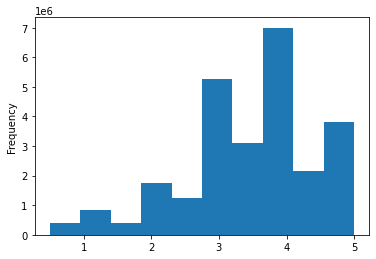

In [126]:
# "Finally, we'll look at the statistics of the actual ratings
# and see if there are any glaring errors. A quick, easy way
# to do this is to look at a histogram of the rating distribu-
# tions, and then use the `describe()` method to print out
# some stats on central tendency and spread."
#
# NOTE: A **histogram** is a bar chart that displays how often
# a data point shows up in the data. A histogram is a quick,
# visual way to get a sense of how a dataset is distributed.

# Code looks like ...
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [127]:
# 8.4.1 Merge Wikipedia and Kaggle Metadata
# "...the Wikipedia data and (the) Kaggle data are cleaned
# up and in tabular formats with the right data types for
# each column, ... can join ...together. However, after
# they're joined, the data still needs to be cleaned up a
# bit, especially where Kaggle and Wikipedia data overlap.

# With all the tables cleaned up, we're ready to merge
# them by IMDb ID. ..One of the things we always want to
# look out for after we've merged data is redundant columns.
# ..Print out a list of the columns so we can identify which
# ones are redundant. We'll use the `suffixes` parameter to
# make it easier to identify which table each column came
# from. ..code should look like:"
movies_df = pd.merge(
    wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

# "There are seven pairs of columns that have redundant
# information. We'll look at each pair of columns and
# decide how to handle the data. ..There are a few options
# when dealing with redundant data. We'll consider two.
# The simplest is to just drop one of the competing columns,
# but sometimes that means a loss of good information.
# Sometimes, one column will have data where the other has
# missing data, and vice versa. In that case, we'd want the
# other option: fill in the gaps using both columns.
#
# Below is the list of competing columns. We'll fill in the
# resolution to each pair as we go along. We'll hold off on
# implementing the resolutions until we make a decision for
# each pair because if we did, we might inadvertently remove
# data that could be helpful in making a later decision."


Competing data: (refer back to table and fill in before
implementing the resolutions) -- discussion/explanations
are in the cells below.
><sup>Table formatting from README.md for course repository,
as edited by TA J Caro.</sup>

|Consideration|Wikipedia|MovieLens(Kaggle)|Resolution|
|---|---|---|---|
|1|title_wiki|title_kaggle|*Drop Wikipedia*.|
|2|running_time|runtime|*Keep Kaggle; fill in zeros with Wikipedia data*.|
|3|budget_wiki|budget_kaggle|*Keep Kaggle; fill in zeros with Wikipedia data*.|
|4|box_office|revenue|*Keep Kaggle; fill in zeros with Wikipedia data*.|
|5|release_date_wiki|release_date_kaggle|**Drop row (index) 3607** *Drop Wikipedia*.|
|6|language|original_language|***Drop Wikipedia***<sup>Keep Kaggle (w/ trade-offs)</sup>.|
|7|Production company(s)|production_companies|*Drop Wikipedia*.|

Let's start comparing columns.

In [128]:
# Consideration 1: --Title --
#
# "First, just take a quick look at some of the titles."
movies_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [129]:
# The titles seem "pretty consistent, which we'd expect.
# Look at the rows where the titles don't match.
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']]\
    [['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [130]:
# "Both options look pretty good, but the Kaggle data
# looks just a little bit more consistent. Let's confirm
# there aren't any missing titles in the Kaggle data with
# the following code:"
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


<AxesSubplot:xlabel='running_time', ylabel='runtime'>

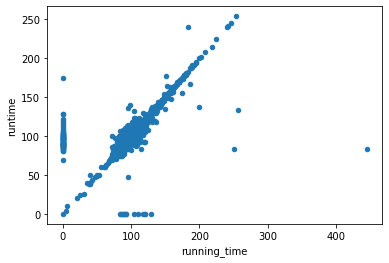

In [131]:
# Consideration 2: --Runtime --
# "Next, look at `running_time` versus `runtime`. A scatter
# plot is a great way to give us a sense of how similar the
# columns are to each other. If the two columns were exactly
# the same, we'd see a scatter plot of a perfectly straight
# line. Any wildly different values will show up as dots far
# from that central line, and if one column is missing data,
# those values will fall on the x-axis or y-axis.

# CAUTION: Because we're dealing with merged data, we should
# expect there to be missing values. Scatter plots won't show
# null values, so we need to fill them in with zeros when
# we're making our plots to get the whole picture.

# The following code will fill in missing values with zero
# and make the scatter plot:
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

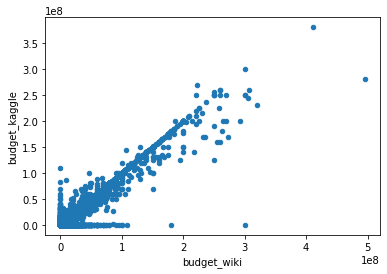

In [132]:
# Consideration 3: --Budget --
# "Since budget_wiki and budget_kaggle are numeric, we'll
# make another scatter plot to compare the values:"
movies_df.fillna(0).plot(x='budget_wiki', y='budget_kaggle', kind='scatter')

<AxesSubplot:xlabel='box office', ylabel='revenue'>

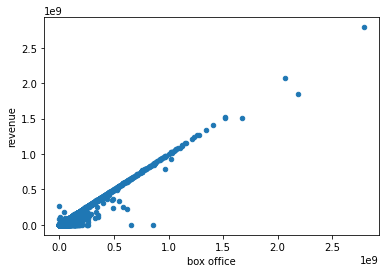

In [133]:
# Consideration 4: --Box Office --
# "The box_office and revenue columns are numeric, so we'll
# make another scatter plot.
movies_df.fillna(0).plot(x='box office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='box office', ylabel='revenue'>

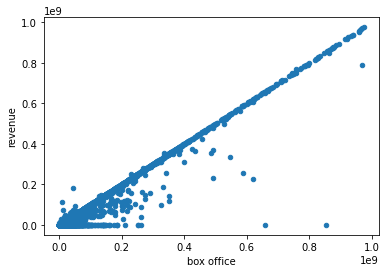

In [134]:
# "That looks pretty close, but we might be getting thrown
# off by the scale of that large data point. Let's look at
# the scatter plot for everything less than $1 billion in
# box_office."
movies_df.fillna(0)[movies_df['box office'] < 10**9].\
    plot(x='box office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='release_date_wiki'>

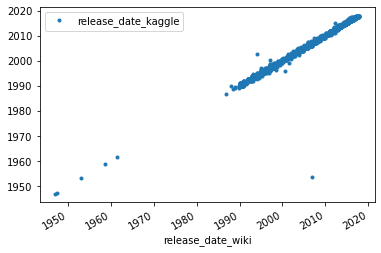

In [135]:
# Consideration 5: --Release Date --
# "For release_date_wiki and release_date_kaggle, we
# can't directly make a scatter plot, because the
# scatter plot only works on numeric data. However,
# there's a tricky workaround that we can use. We'll
# use the regular line plot (which can plot date data),
# and change the style to only put dots by adding
# `style='.'` to the `plot()` method:"
movies_df[['release_date_wiki','release_date_kaggle']].\
    plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [136]:
# "We should investigate that wild outlier around 2006.
# We're just going to choose some rough cutoff dates to
# single out that one movie. We'll look for any movie
# whose release date according to Wikipedia is after
# 1996, but whose release date according to Kaggle is
# before 1965. Here's what your code should look like:"
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') &\
        (movies_df['release_date_kaggle'] < '1965-01-01')]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3607,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",Dean Cundey,"[December 8, 2006, (, 2006-12-08, )]",United States,English,...,1953-08-28,"30,500,000.00",118.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.20,137.00


In [137]:
# "Based on the output, it looks like somehow *The Holiday*
# in Wikipedia data got merged with *From Here to Eternity*.
# We'll have to drop that row from our DataFrame. We'll get
# the index of that row with the following:
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') &\
        (movies_df['release_date_kaggle'] < '1965-01-01')].index

Int64Index([3607], dtype='int64')

In [138]:
# "Then we can drop that row like this:"
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') &\
                                   (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [139]:
# "Now, see if there are any null values:"
movies_df[movies_df['release_date_wiki'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
1008,https://en.wikipedia.org/wiki/Black_Scorpion_(...,1995,https://www.imdb.com/title/tt0112519/,Black Scorpion,NaN,"[Joan Severance, Bruce Abbott, Garrett Morris]",Geoff George,NaN,United States,NaN,...,1995-08-22,0.00,92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Justice has a nasty sting.,Black Scorpion,False,6.10,7.00
1061,https://en.wikipedia.org/wiki/Flirt_(1995_film),1995,https://www.imdb.com/title/tt0113080/,Flirt,NaN,"[Bill Sage, Dwight Ewell, Miho Nikaido]",Michael Spiller,NaN,"[United States, Germany, Japan, [1]]",NaN,...,1995-09-14,0.00,85.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Flirt,False,7.50,4.00
1121,https://en.wikipedia.org/wiki/Let_It_Be_Me_(19...,1995,https://www.imdb.com/title/tt0113638/,Let It Be Me,NaN,NaN,Miroslav Ondrícek,NaN,NaN,NaN,...,1995-11-17,0.00,95.00,[],Released,NaN,Let It Be Me,False,8.00,2.00
1564,https://en.wikipedia.org/wiki/A_Brooklyn_State...,1997,https://www.imdb.com/title/tt0118782/,A Brooklyn State of Mind,NaN,NaN,Ken Kelsch,NaN,NaN,NaN,...,1998-01-01,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Brooklyn State of Mind,False,5.00,1.00
1633,https://en.wikipedia.org/wiki/Highball_(film),1997,https://www.imdb.com/title/tt0119291/,Highball,NaN,"[Justine Bateman, Peter Bogdanovich, Chris Eig...",Steven Bernstein,NaN,United States,English,...,1997-01-01,0.00,110.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Highball,False,4.50,4.00
1775,https://en.wikipedia.org/wiki/Velocity_Trap,1997,https://www.imdb.com/title/tt0120435/,Velocity Trap,NaN,"[Olivier Gruner, Alicia Coppola, Ken Olandt]",Philip D. Schwartz,NaN,United States,NaN,...,1999-02-22,0.00,86.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Crime at the Speed of Light,Velocity Trap,False,4.70,6.00
2386,https://en.wikipedia.org/wiki/The_Visit_(2000_...,2000,https://www.imdb.com/title/tt0199129/,The Visit,NaN,"[Hill Harper, Billy Dee Williams, Obba Babatun...",John L. Demps Jr.,NaN,NaN,English,...,2000-01-01,0.00,107.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,NaN,The Visit,False,0.00,0.00
2786,https://en.wikipedia.org/wiki/Stevie_(2002_film),2002,https://www.imdb.com/title/tt0334416/,Stevie,NaN,NaN,"[Dana Kupper, Gordon Quinn, Peter Gilbert]",NaN,United States,English,...,2002-09-09,"97,000.00",140.00,[],NaN,NaN,Stevie,False,6.70,13.00
3174,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,Return to Sender,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",NaN,NaN,"[Denmark, USA, UK]",NaN,...,2004-09-17,0.00,109.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.90,13.00
3651,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,Live Free or Die,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",NaN,NaN,United States,English,...,2006-03-11,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.50,8.00


In [140]:
movies_df[movies_df['release_date_kaggle'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


In [141]:
# see that "(t)he Wikipedia data is missing release
# dates for 11 movies(, b)ut the Kaggle data isn't
# missing any release dates. In this case, we'll just
# drop the Wikipedia data."

In [142]:
# Consideration 6: --Language --
# "For the language data, we'll compare the value counts
# of each. However, consider the following code:"
movies_df['Language'].value_counts()

# "This code throws an error because some of the language
# data points are stored as lists"...
#TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


English                        5479
[English, Spanish]               68
[English, French]                35
[English, Japanese]              25
[English, Russian]               23
                               ... 
[English /, Zulu]                 1
[English, Hebrew, Spanish]        1
[English, Japanese, French]       1
[English, Spanish, Apache]        1
Russian                           1
Name: Language, Length: 197, dtype: int64

In [143]:
# "NOTE: We don't need to worry about what hashing is
# right now, but if you're curious, **hashing** is a
# clever computer science trick that can be used to
# speed up algorithms like getting value counts.
# Hashing converts values, even arbitrarily long strings,
# to a limited space of numerical values. We'll talk
# about hashing more when we get to machine learning, but
# for now, the important part is that Python creates hash
# values when new objects are created if they are immu-
# table. Since mutable objects can have their values
# change after being created, the values might change and
# not match the hash, so Python just refuses.

# We need to convert the lists in `Language` to tuples so
# that the `value_counts()` method will work. See the
# following code:"
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).\
                       value_counts(dropna=False)

English                        5479
NaN                             134
(English, Spanish)               68
(English, French)                35
(English, Japanese)              25
                               ... 
(English /, Zulu)                 1
(English, Hebrew, Spanish)        1
(English, Japanese, French)       1
(English, Spanish, Apache)        1
Russian                           1
Name: Language, Length: 198, dtype: int64

In [144]:
# "For the Kaggle data, there are no lists, so we can
# just run `value_counts()` on it."
movies_df['original_language'].value_counts(dropna=False)

en    5987
fr      16
es      10
it       8
de       6
ja       4
pt       4
zh       4
da       2
hi       2
sv       1
ko       1
ab       1
tr       1
he       1
ar       1
cn       1
ru       1
Name: original_language, dtype: int64

In [145]:
# Consideration 7: --Production Companies --
# "Again, we'll start off just taking a look at a small
# number of samples."
movies_df[['Production company(s)','production_companies']]

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6047,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


In [146]:
# --Put It All Together -_-
#
# "First, we'll drop the...
#  - title_wiki
#  - release_date_wiki
#  - Language
#  - Production company(s)
# ..columns."
movies_df.drop(columns=['title_wiki','release_date_wiki','Language',\
                       'Production company(s)'], inplace=True)

In [147]:
# "Next, to save a little time, we'll make a function
# that fills in missing data for a column pair and then
# drops the redundant column."

def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column],\
            axis=1)
    df.drop(columns=wiki_column, inplace=True)

In [148]:
# "Now, we can run the function for the three column
# pairs that we decided to fill in zeros."
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')

fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')

fill_missing_kaggle_data(movies_df, 'revenue', 'box office')

movies_df

,url,year,imdb_link,Based on,Starring,Cinematography,Release date,Country,Director,Distributor(s),...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,Renny Harlin,20th Century Fox,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,James Foley,Avenue Pictures,...,1990-08-24,"2,700,000.00",114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,Roger Spottiswoode,TriStar Pictures,...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,Woody Allen,Orion Pictures,...,1990-12-25,"7,331,647.00",102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",US,John Cornell,Paramount Pictures,...,1990-12-21,"6,939,946.00",95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,NaN,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,"[12 February 2017, (, 2017-02-12, ), (, Berlin...","[Chile, Germany, Spain, United States, [2]]",Sebastián Lelio,"[Participant Media (Chile), Piffl Medien (Germ...",...,2017-04-06,"3,700,000.00",104.00,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.20,13.00
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,"[April 22, 2017, (, 2017-04-22, ), (, Tribeca ...",United States,Brian Crano,Good Deed Entertainment,...,2017-04-22,NaN,96.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.00,1.00
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,"[18 May 2017, (, 2017-05-18, ), (, Cannes, ), ...","[Russia, France, Belgium, Germany, [3]]",Andrey Zvyagintsev,"[Sony Pictures Releasing, (Russia), [1]]",...,2017-06-01,"4,800,000.00",128.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.80,26.00
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Andrew Reed,"[March 12, 2017, (, 2017-03-12, ), (, SXSW, ),...",United States,Aaron Katz,Neon,...,2017-03-12,"200,340.00",92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Ge

In [149]:
# "Since we've merged out data and filled in values, it's
# good to check that there aren't any columns with only
# one value, since that doesn't really provide any informa-
# tion. Don't forget, we need to convert lists to tuples
# for `value_counts()` to work."
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [150]:
# "Running this (code in cell above ^^^), we see that
# `video` only has one value:"
movies_df['video'].value_counts(dropna=False)

False    6051
Name: video, dtype: int64

In [151]:
# Compare the output above ^^^ to the online material.
# "Since it's (value is the same:) false for every row,
# we don't need to include this column."

# Skill Drill: How could you replace the previous `for`
# loop with a list comprehension?

# --To get general format of second (much faster) and third print statements
#   below reviewed a couple posts from stackoverflow:
# https: //stackoverflow.com/questions/21531222/
#    is-it-possible-to-use-for-loops-inside-print-statement-in-python
# &

# for col in movies_df.columns:
#     print(f"{col}:  {len(movies_df[col].apply(lambda x: tuple(x) if type(x) == list else x).value_counts())}")

# print(
#     f"{[(col,len(movies_df[col].apply(lambda x: tuple(x) if type(x) == list else x).value_counts())) for col in movies_df.columns if (len(movies_df[col].apply(lambda x: tuple(x) if type(x) == list else x).value_counts()) == 1)]}")

# print(f"{[(col,len(movies_df[col].value_counts())) for col in movies_df.columns if (len(movies_df[col].value_counts())==1)]}")


print(
    f"{[(col,len(movies_df[col].apply(lambda x: tuple(x) if type(x) == list else x).value_counts())) for col in movies_df.columns if (len(movies_df[col].apply(lambda x: tuple(x) if type(x) == list else x).value_counts()) < 10000)]}")


[('url', 6048), ('year', 29), ('imdb_link', 6048), ('Based on', 1794), ('Starring', 5916), ('Cinematography', 1643), ('Release date', 4652), ('Country', 468), ('Director', 2917), ('Distributor(s)', 1348), ('Editor(s)', 2727), ('Composer(s)', 1935), ('Producer(s)', 5172), ('Writer(s)', 4544), ('imdb_id', 6048), ('belongs_to_collection', 567), ('budget_kaggle', 385), ('genres', 1237), ('homepage', 1771), ('id', 6048), ('original_language', 18), ('original_title', 5991), ('overview', 6042), ('popularity', 6049), ('poster_path', 6046), ('production_companies', 4323), ('production_countries', 374), ('release_date_kaggle', 3465), ('revenue', 4814), ('runtime', 146), ('spoken_languages', 445), ('status', 4), ('tagline', 4899), ('title_kaggle', 5991), ('video', 1), ('vote_average', 76), ('vote_count', 1600)]


In [152]:
(movies_df[(movies_df['homepage'].isnull())]['homepage'].apply(lambda x: tuple(x) if type(x) == list else x))

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6047   NaN
6048   NaN
6049   NaN
6050   NaN
6051   NaN
Name: homepage, Length: 4255, dtype: float64

In [153]:
movies_df['homepage'].value_counts(dropna=False).index

Index([                                     nan,
            'http://www.missionimpossible.com/',
            'http://www.transformersmovie.com/',
             'http://www.thehungergames.movie/',
                  'http://www.kungfupanda.com/',
         'http://www.howtotrainyourdragon.com/',
               'http://www.lordoftherings.net/',
           'http://www.theamazingspiderman.com',
                 'http://www.munkyourself.com/',
                      'http://stepupmovie.com/',
       ...
        'http://www.bangkokdangerousmovie.net/',
                   'http://www.ballastfilm.com',
               'http://www.babylonadmovie.com/',
                'http://www.babymamamovie.net/',
                'http://www.americancarol.com/',
            'http://www.27dressesthemovie.com/',
       'http://www.sonypictures.com/movies/21/',
                      'http://www.ywyfilm.com/',
             'http://www.youkillmethefilm.com/',
           'http://www.gfmfilms.co.uk/stratton'],
      dt

In [154]:
len(movies_df.columns.to_list())

37

In [155]:
movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Country',
 'Director',
 'Distributor(s)',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Writer(s)',
 'imdb_id',
 'belongs_to_collection',
 'budget_kaggle',
 'genres',
 'homepage',
 'id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date_kaggle',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title_kaggle',
 'video',
 'vote_average',
 'vote_count']

In [156]:
# "We should reorder the columns to make the dataset
# easier to read for the hackathon participants. Having
# similar columns near each other helps people looking
# through the data get a better sense of what informa-
# tion is available. One way to reorder them would be
# to consider the columns roughly in groups, like this:
# (1) Identifying information (IDs, titles, URLs, etc.)
# (2) Quantitative facts (runtime, budget, revenue, etc.)
# (3) Qualitative facts (genres, languages, country, etc.)
# (4) Business data (production companies, distributors, etc.)
# (5) People (producers, director, cast, writers, etc.)

# The following code is one way to reorder the columns:"
movies_df = movies_df.loc[:, ['imdb_id', 'id', 'title_kaggle',
                             'original_title', 'tagline',
                             'belongs_to_collection', 'url',
                             'imdb_link', 'runtime', 'budget_kaggle',
                             'revenue', 'release_date_kaggle', 'popularity',
                             'vote_average', 'vote_count', 'genres',
                             'original_language','overview','spoken_languages',
                             'Country', 'production_companies', 'production_countries',
                             'Distributor(s)', 'Producer(s)', 'Director', 'Starring',
                             'Cinematography', 'Editor(s)', 'Writer(s)', 'Composer(s)',
                             'Based on']]

In [157]:
len(movies_df.columns.to_list())

31

In [158]:
movies_df.columns.to_list()

['imdb_id',
 'id',
 'title_kaggle',
 'original_title',
 'tagline',
 'belongs_to_collection',
 'url',
 'imdb_link',
 'runtime',
 'budget_kaggle',
 'revenue',
 'release_date_kaggle',
 'popularity',
 'vote_average',
 'vote_count',
 'genres',
 'original_language',
 'overview',
 'spoken_languages',
 'Country',
 'production_companies',
 'production_countries',
 'Distributor(s)',
 'Producer(s)',
 'Director',
 'Starring',
 'Cinematography',
 'Editor(s)',
 'Writer(s)',
 'Composer(s)',
 'Based on']

In [159]:
# "Finally, we need to rename the columns to be consistent."
movies_df.rename({'id': 'kaggle_id',
                  'title_kaggle': 'title',
                  'url': 'wikipedia_url',
                  'budget_kaggle': 'budget',
                  'release_date_kaggle': 'release_date',
                  'Country': 'country',
                  'Distributor(s)': 'distributor',
                  'Producer(s)': 'producers',
                  'Director': 'director',
                  'Starring': 'starring',
                  'Cinematography': 'cinematography',
                  'Editor(s)': 'editors',
                  'Writer(s)': 'writers',
                  'Composer(s)': 'composers',
                  'Based on': 'based_on'},
                axis='columns', inplace=True)

# "NOTE: If you did not use `.loc` to reorder the columns
# and instead passed a list of column names to the indexing
# operator (i.e., `movies_df = movies_df[['imdb_id', 'title_kaggle', ...]]`),
# you may receive a SettingWithCopyWarning. Don't panic! This
# isn't an error, so your code will continue to work, but it is
# a warning that (the) code may not behave as expect(ed). In
# this case, your code will work fine, but for best practices,
# use `.loc` instead to avoid this warning.

# After this cell is run, ...first merge is done! ...the tough
# one out of the way first, ...we're almost done."

In [160]:
len(movies_df.columns.to_list())

31

In [161]:
movies_df.columns.to_list()

['imdb_id',
 'kaggle_id',
 'title',
 'original_title',
 'tagline',
 'belongs_to_collection',
 'wikipedia_url',
 'imdb_link',
 'runtime',
 'budget',
 'revenue',
 'release_date',
 'popularity',
 'vote_average',
 'vote_count',
 'genres',
 'original_language',
 'overview',
 'spoken_languages',
 'country',
 'production_companies',
 'production_countries',
 'distributor',
 'producers',
 'director',
 'starring',
 'cinematography',
 'editors',
 'writers',
 'composers',
 'based_on']

In [176]:
# look over some of the DataFrame data
movies_df.head(10)

,imdb_id,kaggle_id,title,original_title,tagline,belongs_to_collection,wikipedia_url,imdb_link,runtime,budget,...,production_countries,distributor,producers,director,starring,cinematography,editors,writers,composers,based_on
0,tt0098987,9548,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,NaN,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.imdb.com/title/tt0098987/,104.00,"49,000,000.00",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",20th Century Fox,"[Steve Perry, Joel Silver]",Renny Harlin,"[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,"[David Arnott, James Cappe]","[Cliff Eidelman, Yello]","[Characters, by Rex Weiner]"
1,tt0098994,25501,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,NaN,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://www.imdb.com/title/tt0098994/,114.00,"6,000,000.00",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Avenue Pictures,"[Ric Kidney, Robert Redlin]",James Foley,"[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Howard E. Smith,"[James Foley, Robert Redlin]",Maurice Jarre,"[the novel, After Dark, My Sweet, by, Jim Thom..."
2,tt0099005,11856,Air America,Air America,The few. The proud. The totally insane.,NaN,https://en.wikipedia.org/wiki/Air_America_(film),https://www.imdb.com/title/tt0099005/,112.00,"35,000,000.00",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",TriStar Pictures,Daniel Melnick,Roger Spottiswoode,"[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[John Eskow, Richard Rush]",Charles Gross,"[Air America, by, Christopher Robbins]"
3,tt0099012,8217,Alice,Alice,NaN,NaN,https://en.wikipedia.org/wiki/Alice_(1990_film),https://www.imdb.com/title/tt0099012/,102.00,"12,000,000.00",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Orion Pictures,Robert Greenhut,Woody Allen,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Susan E. Morse,Woody Allen,NaN,NaN
4,tt0099018,25943,Almost an Angel,Almost an Angel,Who does he think he is?,NaN,https://en.wikipedia.org/wiki/Almost_an_Angel,https://www.imdb.com/title/tt0099018/,95.00,"25,000,000.00",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Paramount Pictures,John Cornell,John Cornell,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,David Stiven,Paul Hogan,Maurice Jarre,NaN
5,tt0099026,79509,The Ambulance,The Ambulance,You'll be in perfect health before you die.,NaN,https://en.wikipedia.org/wiki/The_Ambulance,https://www.imdb.com/title/tt0099026/,91.00,NaN,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Triumph Releasing Corporation,"[Larry Cohen, Moctesuma Esparza, Robert Katz]",Larry Cohen,"[Eric Roberts, James Earl Jones, Red Buttons, ...",Jacques Haitkin,"[Claudia Finkle, Armond Leibowitz]",Larry Cohen,Jay Chattaway,NaN
6,tt0099028,41326,American Dream,American Dream,"The award-winning film of American lives, Amer...",NaN,https://en.wikipedia.org/wiki/American_Dream_(...,https://www.imdb.com/title/tt0099028/,98.00,NaN,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",Prestige Films,"[Arthur Cohn, Barbara Kopple]","[Barbara Kopple, Co-directors:, Cathy Caplan, ...",NaN,"[Tom Hurwitz, Mathieu Roberts, Nesya Shapiro]","[Cathy Caplan, Thomas Haneke, Lawrence Silk]",NaN,Michael Small,NaN
7,tt0101326,25528,American Ninja 4: The Annihilation,American Ninja 4: The Annihilation,NaN,"{'id': 91945, 'name': 'American Ninja Collecti...",https://en.wikipedia.org/wiki/American_Ninja_4...,https://www.imdb.com/title/tt0101326/,99.00,NaN,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Cannon Group,Ovidio G Assonitis,Cedric Sundstrom,"[Michael Dudikoff, David Bradley, James Booth,...",NaN,NaN,David Geeves,NaN,NaN
8,tt0099044,11595,Another 48 Hrs.,Another 48 Hrs.,The boys are back in town.,"{'id': 93295, 'name': '48 Hrs. Collection', 'p...",https://en.wikipedia.org/wiki/Another

In [162]:
movies_df['distributor'].value_counts(dropna=False).index

Index([                                                    '20th Century Fox',
                                                         'Universal Pictures',
                                                       'Buena Vista Pictures',
                                                      'Warner Bros. Pictures',
                                                         'Paramount Pictures',
                                                          'Columbia Pictures',
                                                               'Warner Bros.',
                                                            'New Line Cinema',
                                                                          nan,
                                                              'Miramax Films',
       ...
                                                                 'Lions Gate',
                              ['Fluid Entertainment', 'Regent Entertainment'],
                      ['Hollywood Indepen

In [163]:
movies_df['director'].value_counts(dropna=False).index

Index([                           'Woody Allen',
                            'Steven Soderbergh',
                               'Clint Eastwood',
                                    'Spike Lee',
                                 'Ridley Scott',
                              'Joel Schumacher',
                             'Steven Spielberg',
                                   'Ron Howard',
                                  'Tyler Perry',
                            'Richard Linklater',
       ...
                                   'Henry Bean',
                              'Jonathan Parker',
                                 'Peter Howitt',
       ['Jennifer Jason Leigh', 'Alan Cumming'],
                                   'Éva Gárdos',
                              'James B. Rogers',
                                  'Cory McAbee',
                                'Anne De Salvo',
                          'Demian Lichtenstein',
                           'Andrey Zvyagintsev'],
      dt

In [172]:
# 8.4.2 Transform and Merge Rating Data
# "*Britta* wants to include the rating data with the
# movie data, but it's a very large dataset. She wants
# to reduce the ratings data to a useful summary of
# rating information for each movie, and then make the
# full dataset available to the hackathon participants
# if they decide they need more granular rating informa-
# tion. ..For each movie, ...(w)e could calculate some
# basic statistics like the mean and median rating ...
# but a more useful summary is just to count how many
# times a movie received a given rating. This way, some-
# one who wants to calculate statistics for the dataset
# would have all the information they need. ..We'll in-
# clude the raw ratings data if the hackathon partici-
# pants want to do more in-depth analysis, such as com-
# paring across users, but having the rating counts for
# each movie is easy enough to do. Plus, it will enable
# the hackathon particcipants to calculate statistics on
# their own without having to work with a dataset con-
# taining 26-million rows. ..First, we need to use a
# `groupby` on the 'movieId' and 'rating' columns and
# take the count for each group."
rating_counts = ratings.groupby(['movieId','rating'],
                                as_index=False).count()

rating_counts.head(15)

,movieId,rating,userId,timestamp
0,1,0.50,441,441
1,1,1.00,804,804
2,1,1.50,438,438
3,1,2.00,2083,2083
4,1,2.50,1584,1584
5,1,3.00,11577,11577
6,1,3.50,5741,5741
7,1,4.00,22020,22020
8,1,4.50,5325,5325
9,1,5.00,15995,15995


In [173]:
# "Then we'll rename the 'userId' column to 'count.'

# NOTE: The choice of renaming 'userId' to 'count' is
# arbitrary. Both 'userId' and 'timestamp' have the
# same information, so we could use either one.
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).\
                        count().rename({'userId':'count'}, axis=1)

rating_counts.dtypes

movieId        int64
rating       float64
count          int64
timestamp      int64
dtype: object

In [174]:
# "Now the magical part. We can pivot this data so that
# `movieId` is the index, the columns will be all the
# rating values, and the rows will be the counts for each
# rating value."
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).\
                count().rename({'userId':'count'}, axis=1).\
                pivot(index='movieId',columns='rating', values='count')

rating_counts.head()

rating,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00
movieId,,,,,,,,,,
1,441.00,804.00,438.00,"2,083.00","1,584.00","11,577.00","5,741.00","22,020.00","5,325.00","15,995.00"
2,263.00,797.00,525.00,"2,479.00","1,810.00","8,510.00","2,916.00","6,035.00",690.00,"2,035.00"
3,169.00,772.00,233.00,"1,665.00",616.00,"6,213.00",759.00,"3,433.00",154.00,"1,483.00"
4,47.00,351.00,31.00,496.00,77.00,"1,133.00",66.00,557.00,12.00,211.00
5,237.00,785.00,270.00,"1,716.00",664.00,"6,608.00",723.00,"2,959.00",166.00,"1,130.00"


In [175]:
# "We want to rename the columns so they're easier to
# understand. We'll prepend `rating_` to each column
# with a list comprehension:"
rating_counts.columns = ['rating_' + str(col) for col in rating_counts.columns]

rating_counts.head()

,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
movieId,,,,,,,,,,
1,441.00,804.00,438.00,"2,083.00","1,584.00","11,577.00","5,741.00","22,020.00","5,325.00","15,995.00"
2,263.00,797.00,525.00,"2,479.00","1,810.00","8,510.00","2,916.00","6,035.00",690.00,"2,035.00"
3,169.00,772.00,233.00,"1,665.00",616.00,"6,213.00",759.00,"3,433.00",154.00,"1,483.00"
4,47.00,351.00,31.00,496.00,77.00,"1,133.00",66.00,557.00,12.00,211.00
5,237.00,785.00,270.00,"1,716.00",664.00,"6,608.00",723.00,"2,959.00",166.00,"1,130.00"


In [177]:
# "Now we can merge the rating counts into `movies_df`.

# This time, we need to use a left merge, since we want
# to keep everything in `movies_df`:"
movies_with_ratings_df = pd.merge(movies_df, rating_counts,
                                  left_on='kaggle_id',
                                  right_index=True,
                                  how='left')

movies_with_ratings_df.head()

,imdb_id,kaggle_id,title,original_title,tagline,belongs_to_collection,wikipedia_url,imdb_link,runtime,budget,...,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
0,tt0098987,9548,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,NaN,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.imdb.com/title/tt0098987/,104.00,"49,000,000.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0098994,25501,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,NaN,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://www.imdb.com/title/tt0098994/,114.00,"6,000,000.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0099005,11856,Air America,Air America,The few. The proud. The totally insane.,NaN,https://en.wikipedia.org/wiki/Air_America_(film),https://www.imdb.com/title/tt0099005/,112.00,"35,000,000.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0099012,8217,Alice,Alice,NaN,NaN,https://en.wikipedia.org/wiki/Alice_(1990_film),https://www.imdb.com/title/tt0099012/,102.00,"12,000,000.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0099018,25943,Almost an Angel,Almost an Angel,Who does he think he is?,NaN,https://en.wikipedia.org/wiki/Almost_an_Angel,https://www.imdb.com/title/tt0099018/,95.00,"25,000,000.00",...,3.00,NaN,3.00,2.00,5.00,26.00,37.00,46.00,16.00,11.00


In [180]:
# "Finally, because not every movie got a rating for each
# rating level, there will be missing values instead of
# zeros. We have to fill those in ourselves ...:"
movies_with_ratings_df[rating_counts.columns] = \
    movies_with_ratings_df[rating_counts.columns].fillna(0)

print(type(rating_counts.columns))

movies_with_ratings_df.head()

<class 'pandas.core.indexes.base.Index'>


,imdb_id,kaggle_id,title,original_title,tagline,belongs_to_collection,wikipedia_url,imdb_link,runtime,budget,...,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
0,tt0098987,9548,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,NaN,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.imdb.com/title/tt0098987/,104.00,"49,000,000.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,tt0098994,25501,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,NaN,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://www.imdb.com/title/tt0098994/,114.00,"6,000,000.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,tt0099005,11856,Air America,Air America,The few. The proud. The totally insane.,NaN,https://en.wikipedia.org/wiki/Air_America_(film),https://www.imdb.com/title/tt0099005/,112.00,"35,000,000.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,tt0099012,8217,Alice,Alice,NaN,NaN,https://en.wikipedia.org/wiki/Alice_(1990_film),https://www.imdb.com/title/tt0099012/,102.00,"12,000,000.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,tt0099018,25943,Almost an Angel,Almost an Angel,Who does he think he is?,NaN,https://en.wikipedia.org/wiki/Almost_an_Angel,https://www.imdb.com/title/tt0099018/,95.00,"25,000,000.00",...,3.00,0.00,3.00,2.00,5.00,26.00,37.00,46.00,16.00,11.00
